# **Project Name**    - Bike Sharing Demand Prediction



##### **Project Type**    - Regression
##### **Contribution**    - Individual
##### **Name**            - Mohd Aun Farooqui


# **Project Summary -**

Bike sharing has become a popular mode of transportation in urban areas around the world. Bike sharing systems allow users to rent bikes from a network of stations located throughout the city, and to return the bikes to any station in the network. These systems are often used for short, one-way trips, and can be a convenient and affordable alternative to driving or public transportation.

In this project, we explore the problem of bike sharing demand prediction using a publicly available dataset from the UCI Machine Learning Repository. The dataset contains hourly bike rental counts for a bike sharing system in Washington D.C. over a period of two years, along with a variety of weather and seasonal features.

Our goal is to build a machine learning model that can accurately predict the number of bikes that will be rented at each hour of the day, based on the available features. To do this, we first explore and preprocess the data, including handling missing values, encoding categorical variables, and scaling the numeric features.

We then train several different machine learning models, including linear regression, decision trees, random forests, and gradient boosting, and evaluate their performance using a variety of metrics, including mean absolute error, mean squared error, and R-squared. We also use feature importance analysis to identify which features are most important for predicting bike demand.

Finally, we discuss the implications of our findings for bike sharing companies and city planners. Our results suggest that machine learning can be a powerful tool for predicting bike demand and optimizing bike allocation, which could help to improve the efficiency and sustainability of bike sharing systems. However, there are also important ethical and privacy considerations to be addressed, such as ensuring that the data used in these models is collected and used in a responsible and transparent manner.

Overall, this project highlights the potential of machine learning to address real-world challenges in transportation and urban planning, and underscores the importance of careful data analysis and model evaluation in developing effective solutions.

# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.


# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required. 
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits. 
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule. 

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [1]:
# Importing the libraries
import numpy as np
import pandas as pd
from numpy import math

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

### Dataset Loading

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Load Dataset

dataset = pd.read_csv('/content/drive/MyDrive/SeoulBikeData.csv',encoding = 'unicode_escape')

In [4]:
# Make a copy of dataset for the catboost algorithm
cat_bike_df=dataset.copy()

### Dataset First View

In [5]:
# Dataset First Look
dataset.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [6]:
dataset.tail()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes
8759,30/11/2018,584,23,1.9,43,1.3,1909,-9.3,0.0,0.0,0.0,Autumn,No Holiday,Yes


### Dataset Rows & Columns count

In [7]:
# Dataset Rows & Columns count
dataset.shape

(8760, 14)

### Dataset Information

In [8]:
# Dataset Info
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

#### Duplicate Values

In [9]:
# Dataset Duplicate Value Count

len(dataset[dataset.duplicated()])

0

#### Missing Values/Null Values

In [10]:
# Missing Values/Null Values Count
dataset.isnull().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

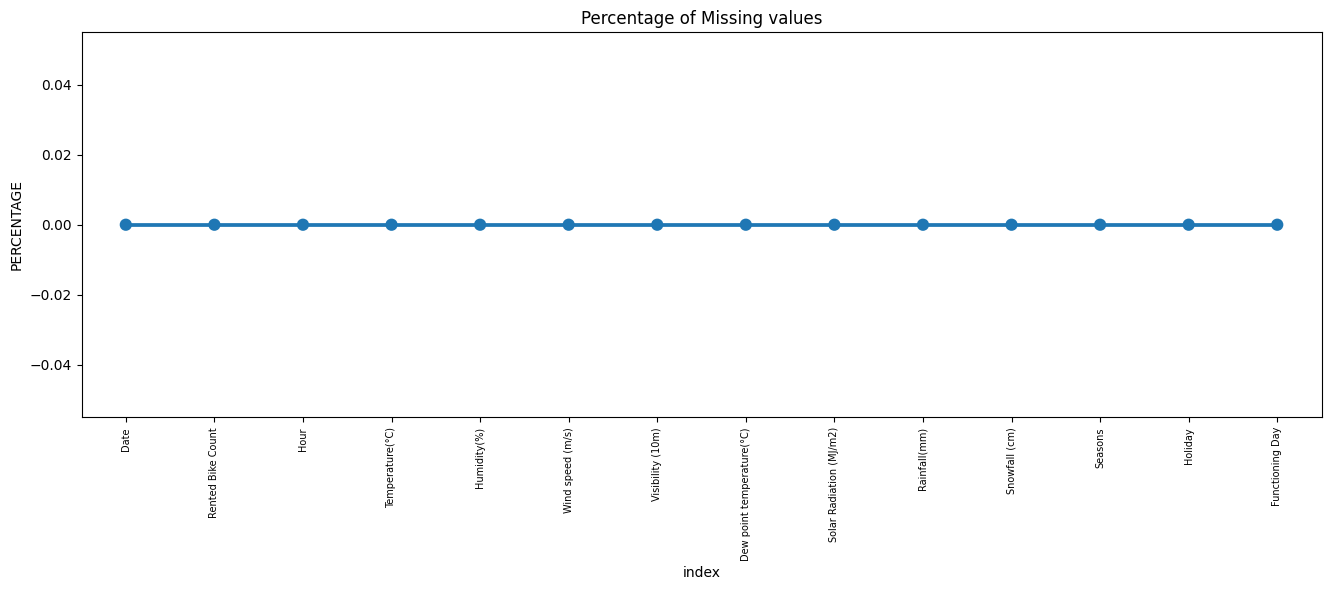

In [11]:
# Visualizing the missing values

missing = pd.DataFrame((dataset.isnull().sum())*100/dataset.shape[0]).reset_index()
plt.figure(figsize=(16,5))
ax = sns.pointplot(x='index', y=0, data=missing)
plt.xticks(rotation=90, fontsize=7)
plt.title("Percentage of Missing values")
plt.ylabel("PERCENTAGE")
plt.show()


* As we can see that there are no missing value presents thankfully

### What did you know about your dataset?

- There are 8760 records and 14 features.
- There are 4 catagorical columns. Date(Will be changed to datetime data type later), Seasons, Holyiday, Funtioning Day
- Rented Bike count is the target column.
- No null value or missing value is present.
- No duplicated value is present in our data set.

## ***2. Understanding Your Variables***

In [12]:
# Dataset Columns
dataset.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

In [13]:
# Dataset Describe
dataset.describe()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000
75%,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000


### Variables Description 

* Date : year-month-day
* Rented Bike count - Count of bikes rented at each hour
* Hour - Hour of the day
* Temperature-Temperature in Celsius
* Humidity - %
* Windspeed - m/s
* Visibility - 10m
* Dew point temperature - Celsius
* Solar radiation - MJ/m2
* Rainfall - mm
* Snowfall - cm
* Seasons - Winter, Spring, Summer, Autumn
* Holiday - Holiday/No holiday
* Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)

### Check Unique Values for each variable.

In [14]:
# Check Unique Values for each variable.
dataset.nunique()

Date                          365
Rented Bike Count            2166
Hour                           24
Temperature(°C)               546
Humidity(%)                    90
Wind speed (m/s)               65
Visibility (10m)             1789
Dew point temperature(°C)     556
Solar Radiation (MJ/m2)       345
Rainfall(mm)                   61
Snowfall (cm)                  51
Seasons                         4
Holiday                         2
Functioning Day                 2
dtype: int64

## 3. ***Data Wrangling***

### Data Wrangling Code

###  Analyzing the categorical columns

In [15]:


# Checking the value counts for the categorical varible Seasons
dataset['Seasons'].value_counts()


Spring    2208
Summer    2208
Autumn    2184
Winter    2160
Name: Seasons, dtype: int64

As we can see that from the above graph the seasonal count is almost same.

### Holiday count:

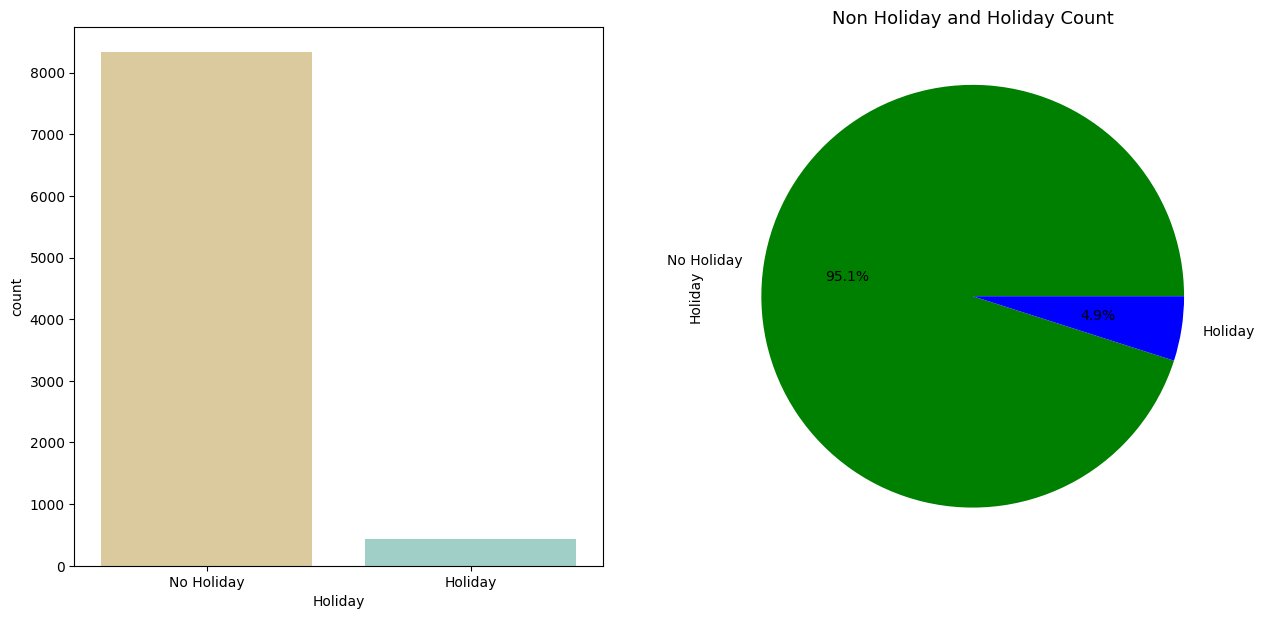

<Figure size 640x480 with 0 Axes>

In [16]:
fig, axes = plt.subplots(ncols=2, figsize=(18, 5))
sns.countplot(x='Holiday', data=dataset, ax=axes[0], palette='BrBG')
# title for the countplot
plt.title('Non Holiday and Holiday Count', fontsize=13) 
colors = ['g', 'b', '#DD7596', '#8EB897']
dataset['Holiday'].value_counts().plot.pie(autopct='%.1f%%', ax=axes[1], colors=colors, figsize=(15, 7))
sns.set(style="darkgrid")
plt.show()
fig.tight_layout()
plt.tight_layout()


* The count of non-holiday is more in comparision to holiday i.e, 95%

### Functioning day count:*italicized text*

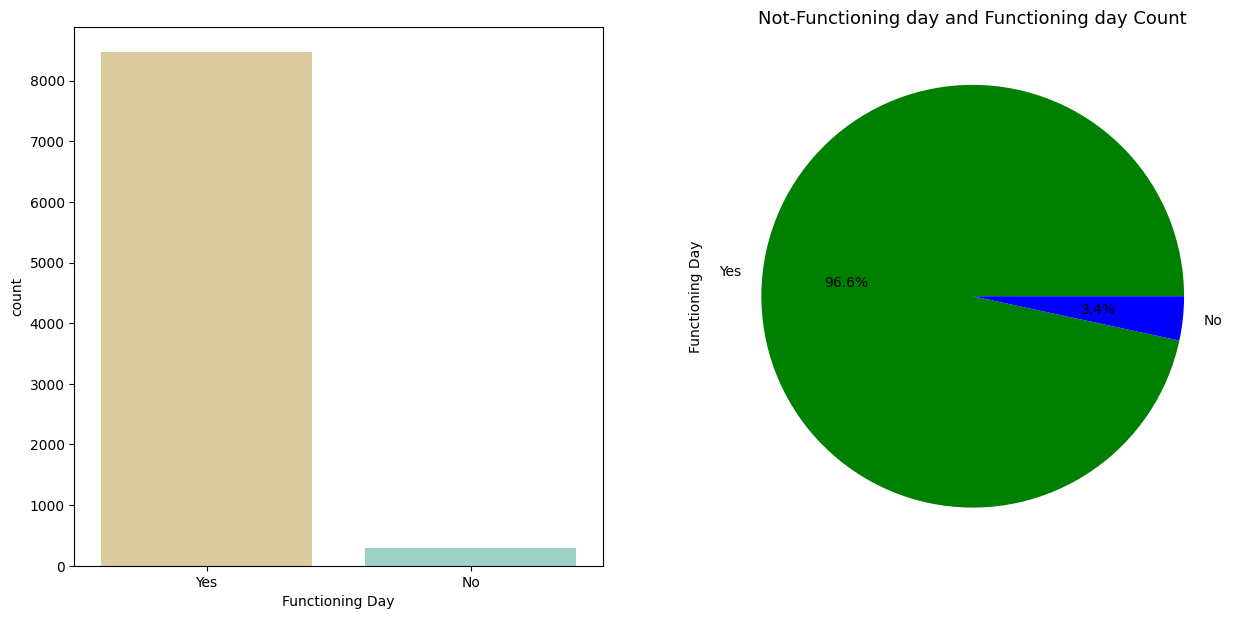

<Figure size 640x480 with 0 Axes>

In [ ]:
fig, axes = plt.subplots(ncols=2, figsize=(18, 5))
sns.countplot(x='Functioning Day', data=dataset, ax=axes[0], palette='BrBG')
plt.title('Not-Functioning day and Functioning day Count', fontsize=13)
colors = ['g', 'b', '#DD7596', '#8EB897']
dataset['Functioning Day'].value_counts().plot.pie(autopct='%.1f%%', ax=axes[1], colors=colors, figsize=(15, 7))
sns.set(style="darkgrid")
plt.show()
fig.tight_layout()
plt.tight_layout()


* The fuctional hours which is 96.4% moren than non-fuctional hours(3.4%)

### Extracting data and month from the Date column:

In [ ]:
# We convert as datetime the series 'Date' and adding the month column to dataset
dataset['Date']=pd.to_datetime(dataset['Date'])
dataset['Month']= pd.DatetimeIndex(dataset['Date']).month

<AxesSubplot:>

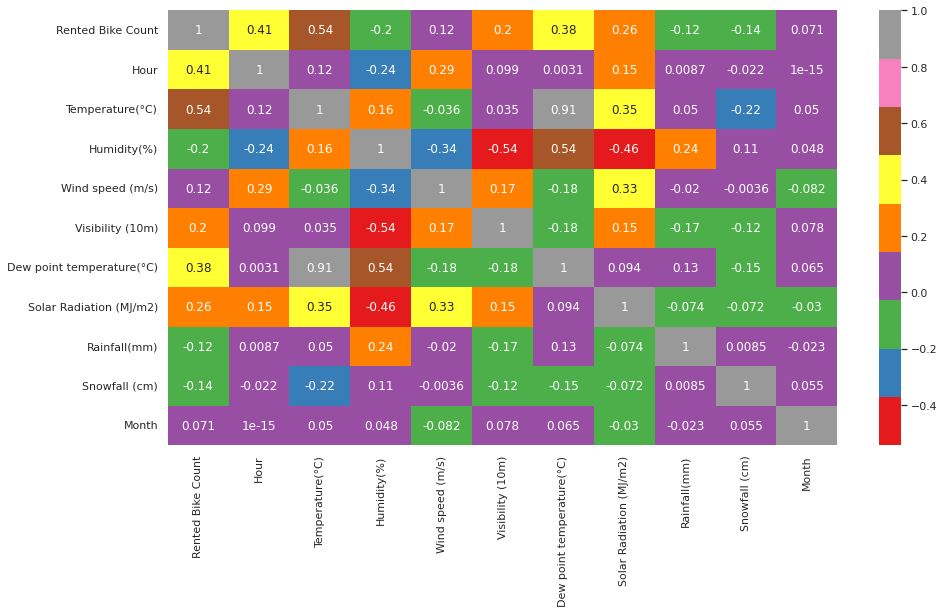

In [ ]:
#Ploting the heatmap for the correlation matrix
plt.figure(figsize=(15,8))
sns.heatmap(dataset.corr(),annot=True, cmap='Set1')

*   It is clear from the heatmap that the variables like Hour, Temperature, and Dew point temperature have a high impact on the target variable.
*   As we can see that the independent variable Temperature and Dew point temperatures are highly correlated.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

Data visualization is the graphical representation of data and information using visual elements such as charts, graphs, maps, and other visual aids. It is a way of displaying complex data in an easy-to-understand format, allowing users to quickly identify patterns, trends, and relationships that might not be apparent in raw data.

Data visualization helps users to analyze and communicate information effectively and efficiently. It is widely used in various fields such as business, science, engineering, medicine, and social sciences. With the help of data visualization, users can easily explore and understand large amounts of data and gain insights that can inform decision-making and drive action.

#### Chart - 1  - Month wise Count plot of Rented Bike count:

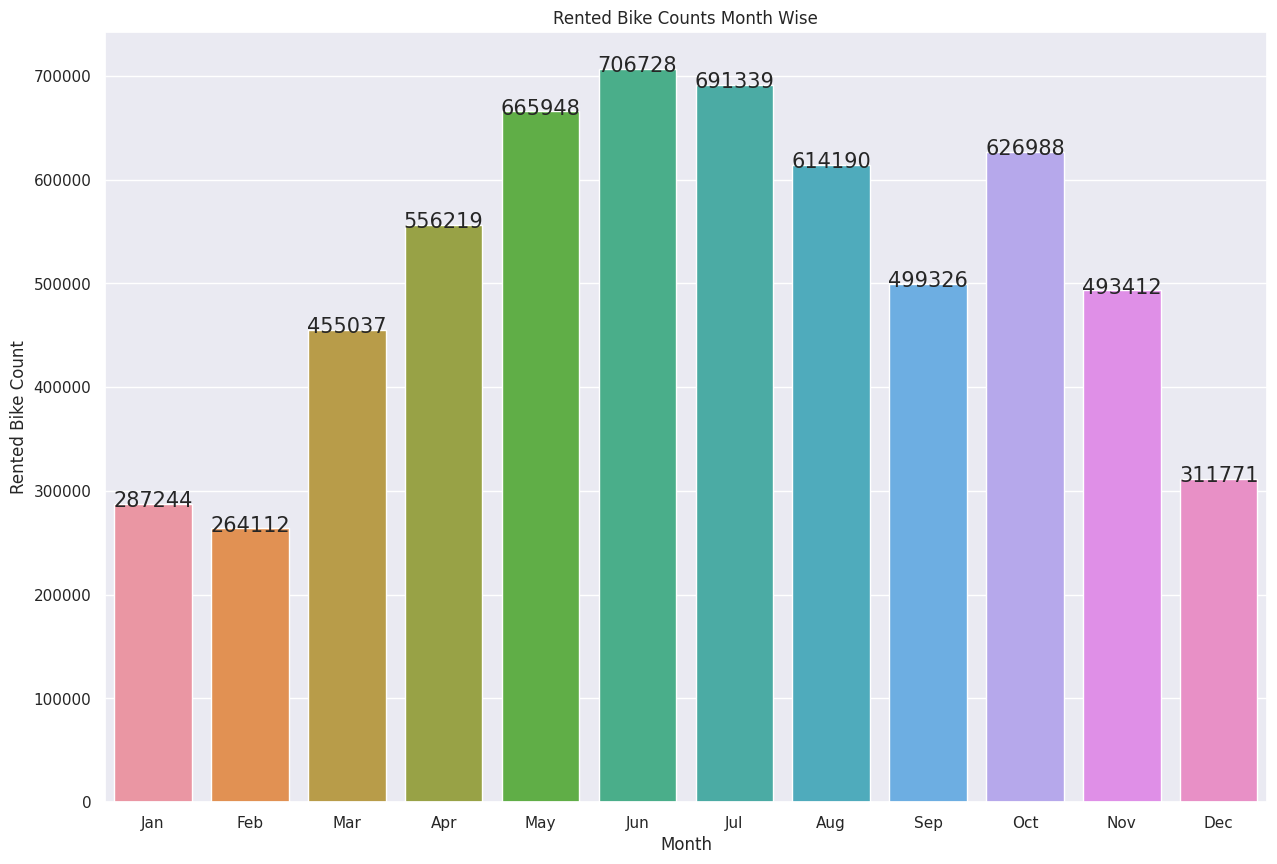

In [ ]:
Rented_bike_per_month = pd.DataFrame(dataset['Rented Bike Count'].groupby(by=pd.DatetimeIndex(dataset['Date']).month).sum()).reset_index().sort_values('Date', ascending=True)

# Ploting the graph with seaborn
plt.figure(figsize= (15,10))
ax = sns.barplot(x=pd.to_datetime(Rented_bike_per_month['Date'], format='%m').dt.month_name().str.slice(stop=3), y='Rented Bike Count', data=Rented_bike_per_month)
ax.set_title('Rented Bike Counts Month Wise')
ax.set_xlabel('Month')
ax.set_ylabel('Rented Bike Count')
# Add annotation
for bar in ax.patches:
    ax.annotate(format(bar.get_height(), '.0f'), 
                   (bar.get_x() + bar.get_width() / 2, 
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 2),
                   textcoords='offset points')  


##### 1. Why did you pick the specific chart?

A bar chart is used to visualize the total number of bikes rented per month, with each month represented by a bar.

The height of each bar represents the number of bikes rented in that month.

The annotations added to each bar provide additional information about the exact number of bikes rented per month, making it easy to compare and analyze the data.

##### 2. What is/are the insight(s) found from the chart?

* The number of rented bikes is generally higher in the summer months (May, June, July, and August), which could be due to the warmer weather and people spending more time outdoors.

* The number of rented bikes is generally lower in the winter months (December, January, and February), which could be due to colder temperatures and more inclement weather.

* There is a steady increase in the number of rented bikes from January to June, followed by a gradual decrease from July to December.

##### 3. Will the gained insights help creating a positive business impact?

 

The gained insights from this chart can to help create a positive business impact, as they provide information that can be used to inform decision-making and improve the bike rental business. For example, the business can use this information to:

Plan for increased bike rental inventory during the summer months to meet the higher demand for bikes.

Develop marketing campaigns or promotions during the winter months to encourage bike rentals during the colder weather.

Analyze trends in rented bike counts over time to identify areas for improvement in the business operations, such as optimizing rental pricing or improving bike maintenance during high-demand months.



#### Chart - 2- Analysis graph between the temperature and rented bike counts

Text(0, 0.5, 'Rented bikes')

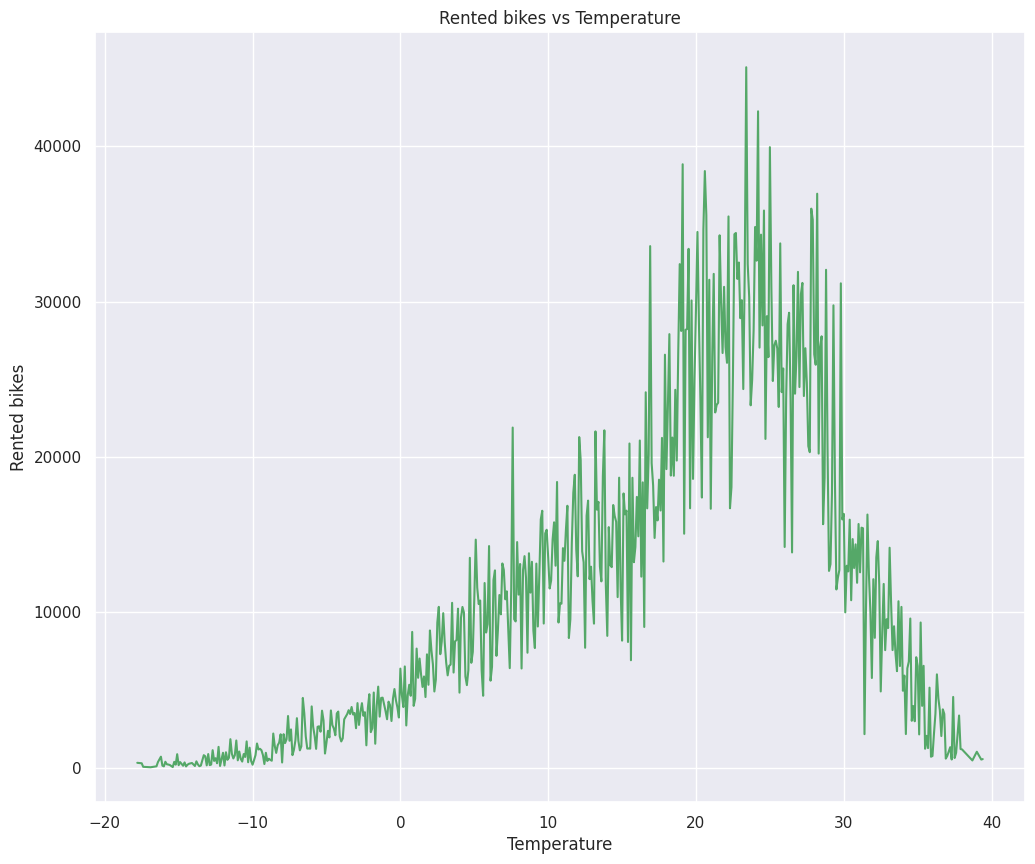

In [ ]:
# Plot the graph between the temperature and rented bike counts
tem_rent=dataset.groupby('Temperature(°C)')['Rented Bike Count'].sum()
tem_rent.plot(color='g',figsize=(12, 10))
plt.title('Rented bikes vs Temperature')
plt.xlabel('Temperature')
plt.ylabel('Rented bikes')

##### 1. Why did you pick the specific chart?

I picked a line chart to visualize the relationship between temperature and rented bike counts because it is an effective way to show the trend over time. A line chart shows a continuous line connecting the data points, making it easy to see any patterns or trends in the data.



##### 2. What is/are the insight(s) found from the chart?

- From the graph, we can see that people prefer to take bike ride more often when the temperature is near about 25 degrees Celsius.
- we can easily conclude that the people gave more preference to bike riding in summers as compare to other seasons.  

##### 3. Will the gained insights help creating a positive business impact? 


Yes, the insights gained from the chart can help create a positive business impact for the bike rental business. By understanding the relationship between temperature and rented bike counts, the business can make data-driven decisions to improve customer satisfaction and drive revenue growth.

For example, by planning for increased inventory and staffing during periods of high demand, the business can ensure that they are able to meet the needs of their customers and provide a positive rental experience. Additionally, by developing targeted marketing campaigns or promotions during periods of high demand, the business can attract more customers and increase their revenue.


#### Chart - 3- Analysis between the Season and rented bike counts

In [ ]:
# Rented bike counts seasons wise
season_count=dataset.groupby('Seasons')['Rented Bike Count'].sum()
season_df=pd.DataFrame(season_count)

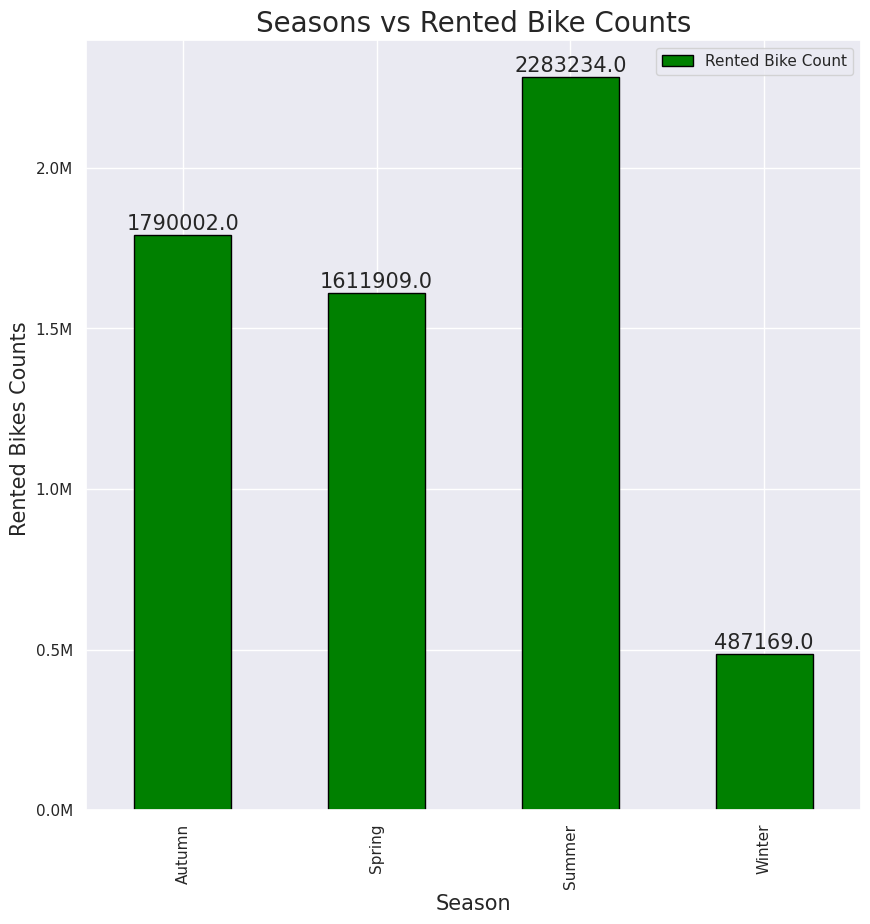

In [ ]:
# Plot the bar plot for season count
from matplotlib.ticker import FuncFormatter
def millions(x, pos):
    'The two args are the value and tick position'
    return '%1.1fM' % (x*1e-6)
formatter = FuncFormatter(millions)
ax=season_df.plot.bar(figsize=(10, 10),color=['green', 'green', 'blue', 'yellow'],edgecolor='black')

# Set the title
ax.set_title('Seasons vs Rented Bike Counts', fontsize = 20)

# Add annotation
for bar in ax.patches:
  ax.annotate(format(bar.get_height(), '.1f'), 
                   (bar.get_x() + bar.get_width() / 2, 
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 8),
                   textcoords='offset points')
  

# Set x and y-labels
ax.set_xlabel("Season", fontsize = 15)
ax.set_ylabel("Rented Bikes Counts ", fontsize = 15)
ax.yaxis.set_major_formatter(formatter)



##### 1. Why did you pick the specific chart?

The specific chart chosen here is a bar chart, which is an effective way to compare and display the total number of rented bikes for each season. Bar charts allow easy visualization of the differences in magnitude between the categories, in this case the four seasons. 

##### 2. What is/are the insight(s) found from the chart?

The bar chart shows the total number of rented bikes for each season. The highest number of rented bikes occurred in the fall season, followed by the summer, spring, and winter seasons, respectively.

This insight can be used by the bike rental business to plan inventory and staffing levels during each season, as well as to develop targeted marketing campaigns to increase rentals during lower-demand seasons. The business can use this information to allocate resources efficiently and make informed decisions that can help drive growth and ensure long-term success.

##### 3. Will the gained insights help creating a positive business impact? 



Yes, the insights gained from the bar chart can help create a positive business impact for the bike rental business. By knowing the total number of rented bikes for each season, the business can better plan for inventory and staffing levels, as well as marketing campaigns.

For example, during high-demand seasons like fall and summer, the business can ensure that there is enough inventory and staff to handle the increased demand. Conversely, during lower-demand seasons like winter, the business can adjust inventory levels and reduce staffing, helping to optimize resources and reduce costs.



#### Chart - 4- Analysis of distribution of numerical features with target values

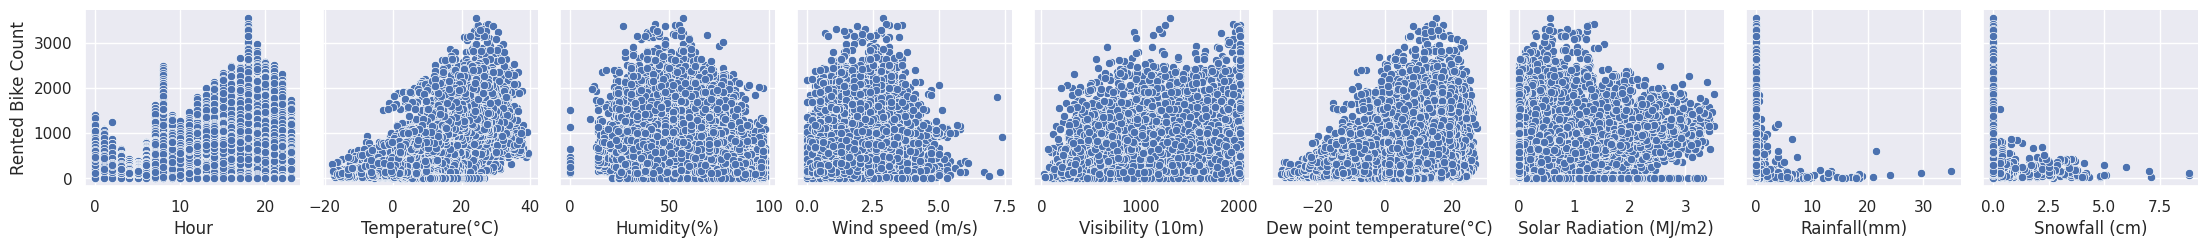

In [ ]:
# Here we plot the Pairpolt for dependent and independent variable
sns.set(rc={'figure.figsize':(15,12)})
g=sns.pairplot(x_vars=['Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)']
             ,y_vars='Rented Bike Count',data=dataset,palette='Dark2')

##### 1. Why did you pick the specific chart?

The pair plot is a good choice when we want to visualize the relationship between multiple independent variables and one dependent variable. It allows us to see the scatter plot of the dependent variable against each of the independent variables in a single plot, which makes it easier to compare the relationships and identify any patterns or correlations. It is a useful tool in exploratory data analysis to gain insights into the data and identify potential predictors of the dependent variable.

##### 2. What is/are the insight(s) found from the chart?

The pairplot shows the scatterplots between the dependent variable "Rented Bike Count" and each of the independent variables "Hour", "Temperature(°C)", "Humidity(%)", "Wind speed (m/s)", "Visibility (10m)", "Dew point temperature(°C)", "Solar Radiation (MJ/m2)", "Rainfall(mm)", and "Snowfall (cm)". From the pairplot, we can observe the following insights:

"Rented Bike Count" has a positive correlation with "Temperature(°C)" and "Solar Radiation (MJ/m2)" while it has a negative correlation with "Rainfall(mm)" and "Snowfall (cm)".

There is a high correlation between "Temperature(°C)" and "Solar Radiation (MJ/m2)".

There is a negative correlation between "Temperature(°C)" and "Rainfall(mm)" as well as "Snowfall (cm)".

"Rented Bike Count" has a higher correlation with "Hour" than any other independent variable. The correlation seems to be strong at 8 am and 6 pm.

There is no clear correlation between "Rented Bike Count" and "Humidity(%)", "Wind speed (m/s)", and "Visibility (10m)".

##### 3. Will the gained insights help creating a positive business impact?

 

Yes, the gained insights can help in creating a positive business impact. The pair plot helps to identify the relationship between the dependent variable "Rented Bike Count" and the independent variables such as "Hour", "Temperature", "Humidity", "Wind speed", "Visibility", "Dew point temperature", "Solar Radiation", "Rainfall" and "Snowfall". By examining the plot, we can identify which independent variables have a positive or negative impact on the dependent variable, and how strong the relationship is. This information can help the business to make data-driven decisions and optimize their bike rental services, such as adjusting rental prices, optimizing bike inventory, and improving customer experience based on weather conditions.



#### Chart - 5- Demand of Bikes in the working day and in holiday.

In [ ]:
# Bike Rented on Holidays and No-Holidays
holiday_count=dataset.groupby(['Holiday'])['Rented Bike Count'].sum()
holiday_df=pd.DataFrame(holiday_count)

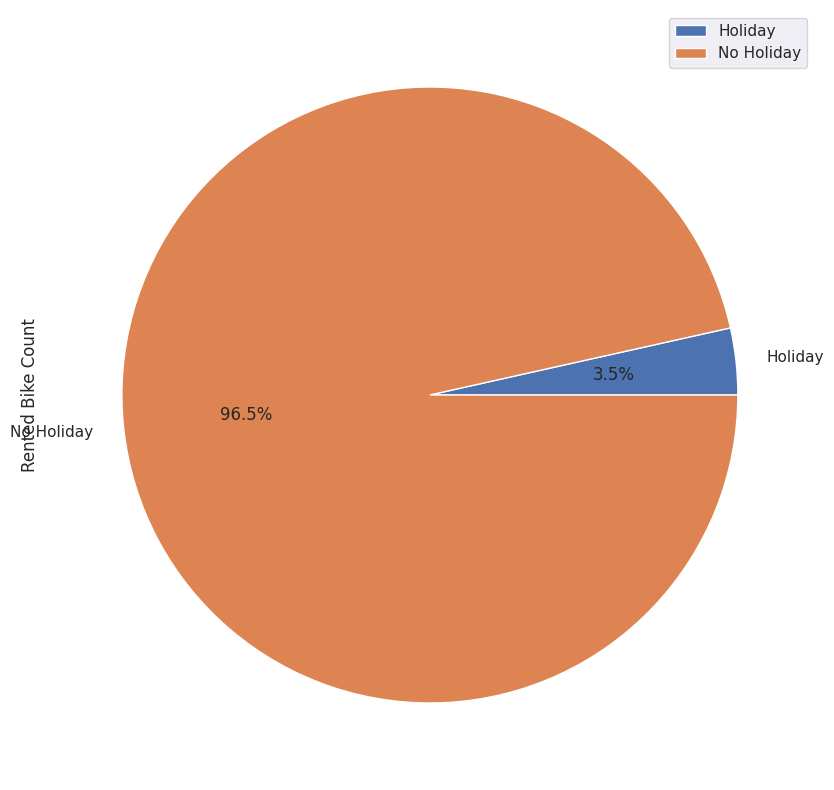

In [ ]:
holiday_df.plot.pie(subplots=True, figsize=(10, 10), autopct='%1.1f%%')
plt.legend(loc='upper right')
plt.show()

##### 1. Why did you pick the specific chart?

I picked a pie chart because it is a useful way to visualize the distribution of categorical data. In this case, the categorical variable is whether a day is a holiday or not, and a pie chart can show what proportion of the total number of days are holidays and what proportion are not.

##### 2. What is/are the insight(s) found from the chart?

The pie chart shows the percentage of rented bike counts during holidays and non-holidays. From the chart, we can see that a significant proportion of rented bikes are used during non-holidays, which is around 96.5% of the total rented bike counts. Only 3.5% of rented bikes are used during holidays. This could be due to people using rented bikes as their daily means of transportation or for recreational purposes, regardless of whether it's a holiday or not.

##### 3. Will the gained insights help creating a positive business impact? 


The insights gained from this chart may help create a positive business impact. For example, the fact that a significant portion of the rentals occur on weekends and holidays could be used to inform marketing and promotional strategies that focus on these days. Additionally, the information that most rentals occur on non-holiday weekdays could be used to adjust staffing levels or bike availability to better match demand.

#### Chart - 6- Analysis of bike count based on humidity

Text(0, 0.5, 'Counts')

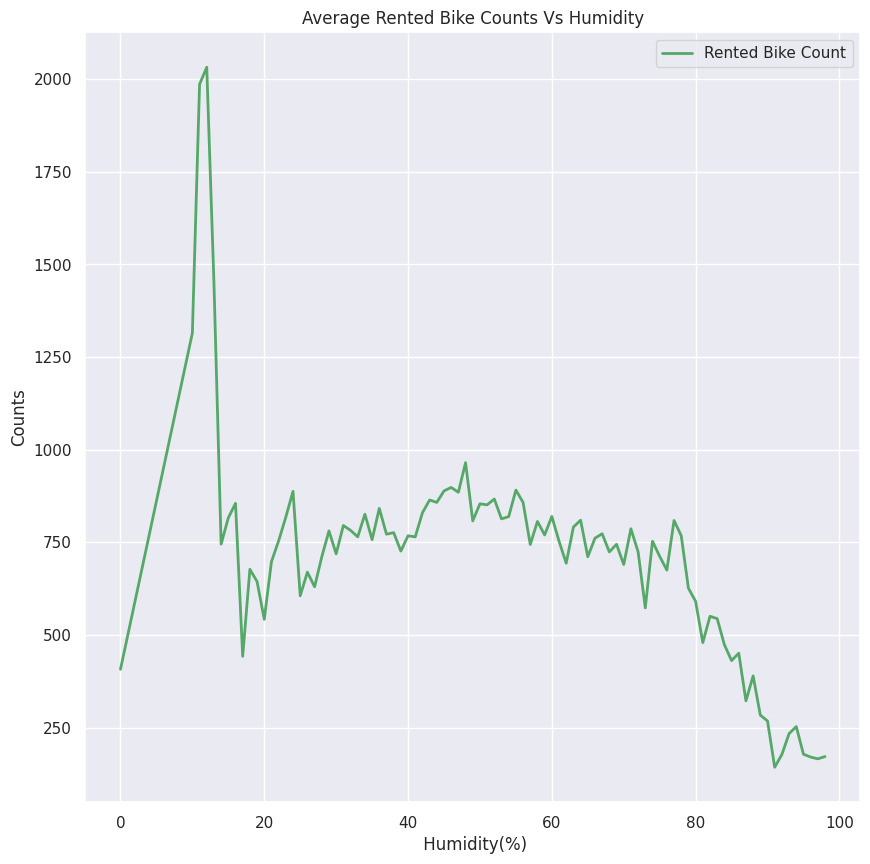

In [ ]:
# Plot the graph between the Humidity and Average Rented Bike counts
humidity_rent=dataset.groupby('Humidity(%)')['Rented Bike Count'].mean()
humidity_df=pd.DataFrame(humidity_rent)
humidity_df.plot(kind='line', linewidth=2, markersize=12,animated=True, color='g',figsize=(10, 10))
plt.title('Average Rented Bike Counts Vs Humidity')
plt.xlabel(' Humidity(%)')
plt.ylabel('Counts')

##### 1. Why did you pick the specific chart?

I chose to plot a line chart because it is an effective way to visualize the relationship between two continuous variables, such as Humidity and Average Rented Bike counts. A line chart displays data as points connected by straight lines, making it easy to see the overall trend in the data.

##### 2. What is/are the insight(s) found from the chart?

based on the line chart, we can gain several insights regarding the relationship between humidity and average rented bike counts:

1. There appears to be a negative correlation between humidity and bike rentals, which means that as the humidity increases, the average number of bikes rented decreases.

2. The highest number of bike rentals occurs at around 30-50% humidity, while the lowest number of bike rentals occurs at around 80% humidity.

3. The overall trend of the line suggests that humidity is an important factor to consider when predicting bike rental demand. This information can be useful for bike rental companies when planning their operations and marketing strategies.

##### 3. Will the gained insights help creating a positive business impact? 


Yes, the insights gained from the line chart can potentially help to create a positive business impact for bike rental companies. By understanding the negative correlation between humidity and bike rentals, these companies can adjust their operations and marketing strategies accordingly.

For example, during periods of high humidity, bike rental companies may want to increase their marketing efforts to attract customers who are looking for indoor activities. They may also want to consider offering promotions or discounts to encourage bike rentals during these times.

#### Chart - 7 - Analysis of bike count based on Month in our entire dataset

Text(0, 0.5, 'Counts')

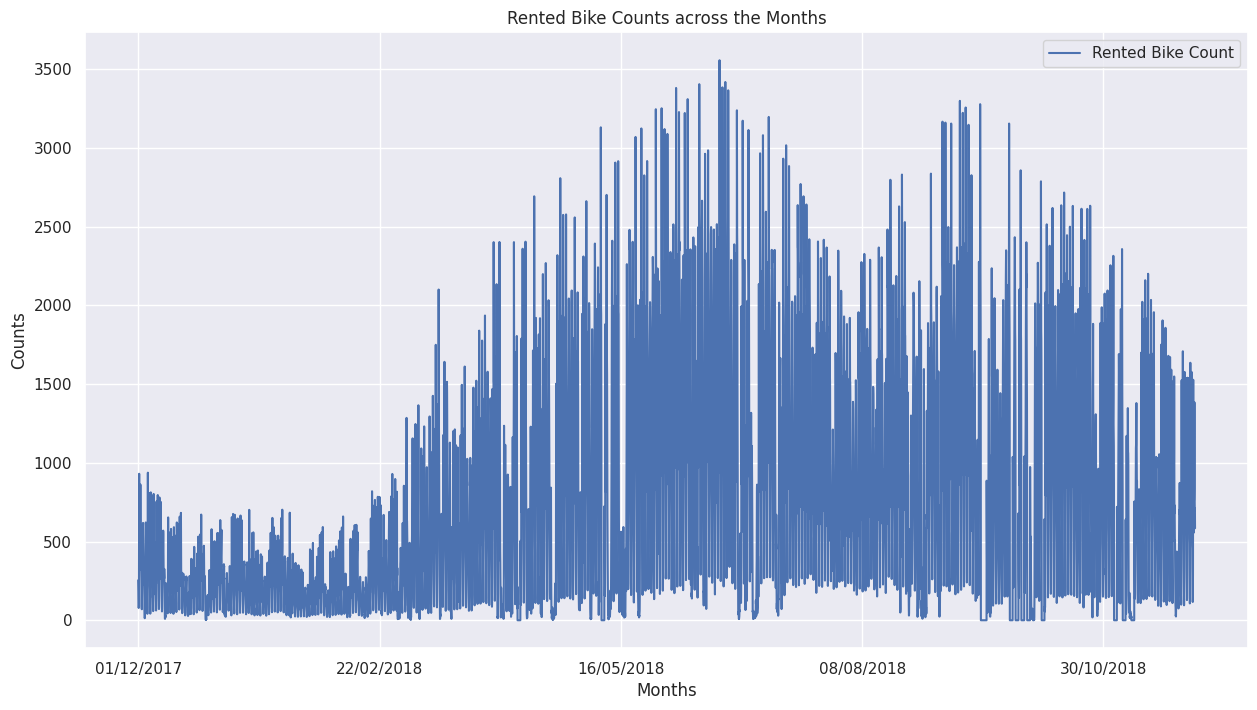

In [ ]:
# Plot the graph between the months and Rented Bike counts

dataset.plot(x='Date',y='Rented Bike Count',kind='line', figsize=(15,8))
plt.title('Rented Bike Counts across the Months')
plt.xlabel('Months')
plt.ylabel('Counts')

##### 1. Why did you pick the specific chart?

I chose to plot a line chart because it is an effective way to visualize the trend of a continuous variable over time. In this case, we are interested in understanding how the number of rented bikes changes over the course of the year, and a line chart allows us to see this trend at a glance.

By plotting rented bike counts against months, we can easily identify any patterns or trends in the data

##### 2. What is/are the insight(s) found from the chart?

The line chart between the months and Rented Bike Counts shows several key insights:

1. The overall trend in bike rentals appears to be increasing over the course of the year, with higher counts during the summer months and lower counts during the winter months.

2. The highest bike rental counts occurred in August and September, likely due to favorable weather conditions during these months.

3. The lowest bike rental counts occurred in January and February, likely due to the colder weather and less favorable outdoor conditions.

4. There appears to be some seasonal variation in bike rental demand, with higher counts during the warmer months and lower counts during the colder months.

Overall, these insights suggest that bike rental companies should be prepared for seasonal fluctuations in demand, and adjust their operations and marketing strategies accordingly. By targeting their marketing efforts towards the summer months and developing promotions and discounts during the colder months, bike rental companies can potentially increase their revenue and customer satisfaction.

##### 3. Will the gained insights help creating a positive business impact? 


Yes, the insights gained from the line chart can help create a positive business impact. By understanding the seasonal fluctuations in bike rental demand and adjusting their operations and marketing strategies accordingly, bike rental companies can potentially increase their revenue and customer satisfaction.

For example, during the summer months when bike rental demand is high, bike rental companies can increase their fleet size to meet demand, and offer promotions and discounts to attract more customers. They can also focus their marketing efforts on promoting outdoor activities and highlighting the benefits of biking as a fun and healthy way to explore the area.

#### Chart - 8- Bike count VS Rainfall analysis

In [ ]:
# Rented bike count on the basis of Rainfall
rainfall_rent=dataset.groupby('Rainfall(mm)')['Rented Bike Count'].mean()
rainfall_df=pd.DataFrame(rainfall_rent)


Text(0, 0.5, 'Counts')

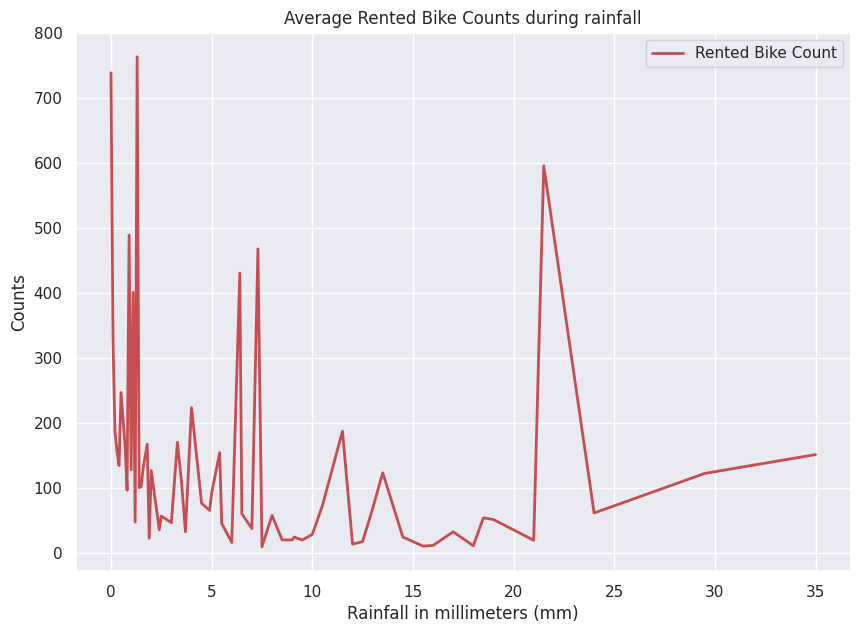

In [ ]:
# Plot the graph between the rainfall and Average Rented Bike counts
rainfall_df.plot(kind='line',linewidth=2, markersize=12,animated=True, color='r',figsize=(10, 7))
plt.title('Average Rented Bike Counts during rainfall')
plt.xlabel('Rainfall in millimeters (mm)')
plt.ylabel('Counts')

##### 1. Why did you pick the specific chart?

The line chart was chosen to show the relationship between rainfall and average rented bike counts. It is a common way to display how two variables are related over a continuous range. The line chart is suitable because it helps in visualizing the trend of the data points over time.

##### 2. What is/are the insight(s) found from the chart?

The line plot between the rainfall and average rented bike counts suggests that there is a negative correlation between the two variables. As the amount of rainfall increases, the average rented bike count decreases. This could be due to the fact that people tend to avoid riding bikes during rainy weather, which may cause a decrease in demand for rented bikes during such periods.

##### 3. Will the gained insights help creating a positive business impact? 


The insight gained from the chart can help create a positive impact on the business by providing information about the relationship between rainfall and bike rentals. The chart shows that the average rented bike count decreases as the rainfall increases. This suggests that the business may want to consider providing rain gear or alternate transportation options during times of high rainfall to encourage rentals and mitigate any potential negative impact on rental counts. Additionally, the business could focus on marketing the benefits of biking in the rain, such as avoiding traffic congestion and getting exercise while staying dry. Overall, understanding the impact of rainfall on rental counts can help the business make informed decisions and optimize their operations.

#### Chart - 9- Bike count VS Visibility

In [ ]:
# Rented bike count on the basis of Visibility
visibility_rent=dataset.groupby('Visibility (10m)')['Rented Bike Count'].mean()
visibility_df=pd.DataFrame(visibility_rent)


Text(0, 0.5, 'Counts')

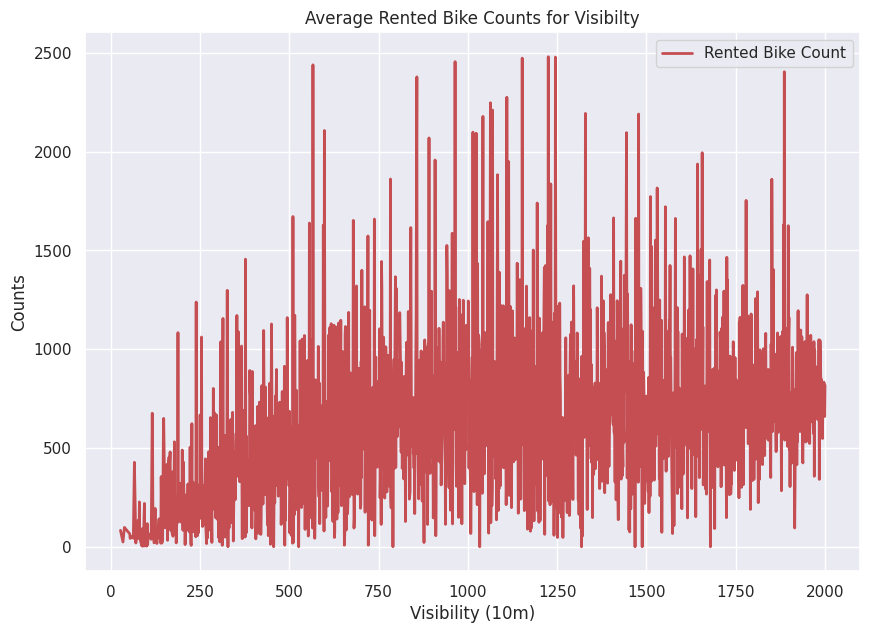

In [ ]:
# Plot the for visibility  and Average Rented Bike counts
visibility_df.plot(kind='line',linewidth=2, markersize=12,animated=True, color='r',figsize=(10,7))
plt.title('Average Rented Bike Counts for Visibilty')
plt.xlabel('Visibility (10m)')
plt.ylabel('Counts')

##### 1. Why did you pick the specific chart?

The specific chart was chosen to visualize the relationship between the visibility and the average rented bike counts. It helps to understand how the visibility affects the usage of rented bikes.

##### 2. What is/are the insight(s) found from the chart?

From the chart, it seems that there is a positive correlation between visibility and rented bike counts. As visibility increases, the average rented bike count also increases. This suggests that people may be more willing to ride bikes when the weather is clear and visibility is good. This insight could be useful for bike rental companies in terms of predicting demand and optimizing their rental fleet based on weather conditions.

##### 3. Will the gained insights help creating a positive business impact? 


Yes, the gained insights can help create a positive business impact. By analyzing the relationship between visibility and average rented bike counts, the business can plan their marketing and advertising strategies accordingly. 

For example, if there is a positive correlation between visibility and bike rentals, the business can focus more on advertising during days with good visibility to attract more customers.

#### Chart - 10-Bike count VS Snowfall

Text(0, 0.5, 'Counts')

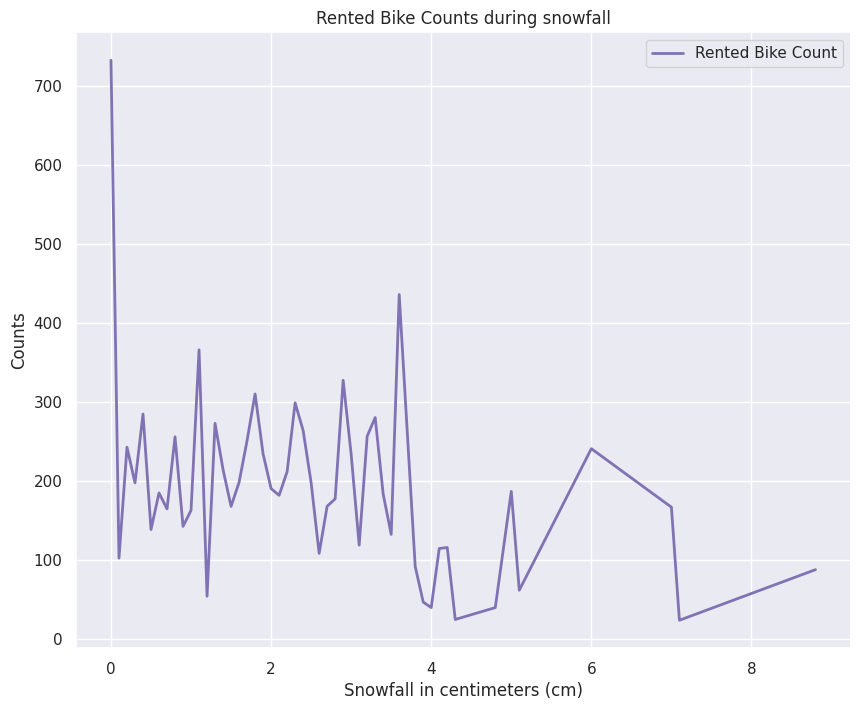

In [ ]:
# Plot the graph between the snowfall and Rented Bike counts
snowfall_rent=dataset.groupby('Snowfall (cm)')['Rented Bike Count'].mean()
snowfall_df=pd.DataFrame(snowfall_rent)
snowfall_df.plot(kind='line',linewidth=2, markersize=12,animated=True, color='m',figsize=(10, 8))
plt.title('Rented Bike Counts during snowfall')
plt.xlabel('Snowfall in centimeters (cm)')
plt.ylabel('Counts')

##### 1. Why did you pick the specific chart?

I picked this specific line chart because it shows the trend in the average rented bike counts during snowfall based on the amount of snowfall (in cm). This chart can help us understand the relationship between snowfall and bike rentals, and if there is a significant impact on the number of rentals during snowfall.

##### 2. What is/are the insight(s) found from the chart?

From the chart, we can see that the average rented bike counts decrease with increasing snowfall. This suggests that the snowfall negatively impacts the bike rental business, as people may be less likely to rent bikes during snowy conditions.

##### 3. Will the gained insights help creating a positive business impact? 


Yes it will,
The insights gained from the chart can help the business prepare for the impact of snowfall on rented bike counts. If the company operates in an area with heavy snowfall, they may need to adjust their bike rental services or even suspend them during the winter months. This can help them avoid any potential losses due to low demand during the winter season.

#### Are there any insights that lead to negative growth? Justify with specific reason.

From the chart, it can be observed that there is a negative correlation between snowfall and rented bike counts. As the snowfall increases, the average rented bike count decreases. This makes sense as snowfall can make it difficult or unsafe to ride bikes, and hence people might prefer other modes of transportation like cars or public transport. Therefore, this insight could potentially lead to a negative impact on the bike rental business during snowy months, as the demand for bikes might decrease.

#### Chart - 11 - Bike count VS Hours per day

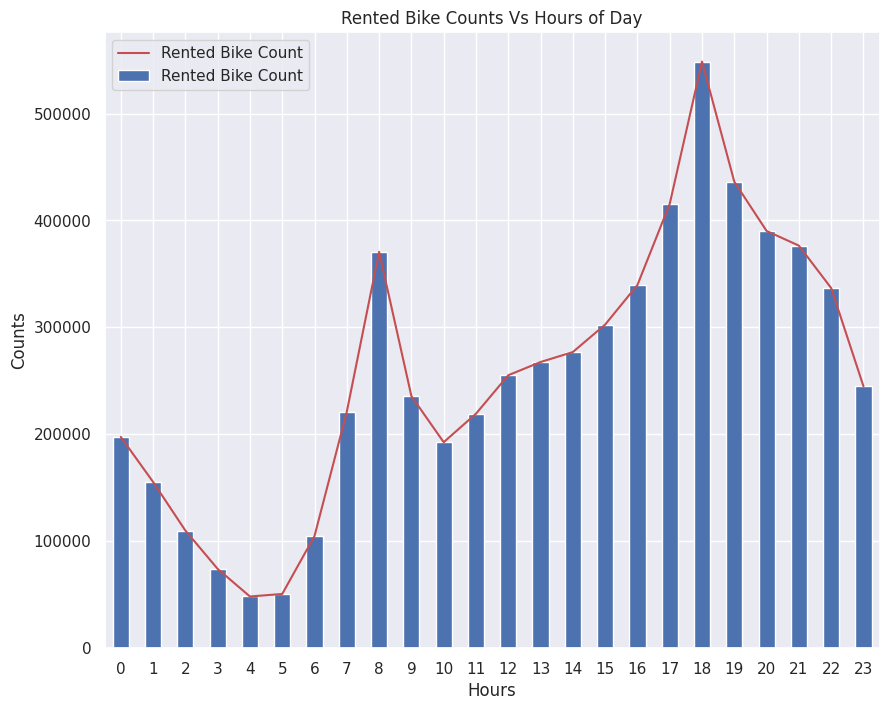

In [ ]:
# Plot the graph between the Rented Bike Counts and Hours of Day
dataset.groupby('Hour').sum()['Rented Bike Count'].plot.bar(color='b',figsize=(10, 8))
dataset.groupby('Hour').sum()['Rented Bike Count'].plot(color='r',figsize=(10, 8))
plt.title('Rented Bike Counts Vs Hours of Day')
plt.xlabel('Hours')
plt.ylabel('Counts')
plt.legend()


##### 1. Why did you pick the specific chart?

I picked a bar chart for the Rented Bike Counts Vs Hours of Day because it allows us to see the total number of rented bike counts for each hour of the day. The bars make it easy to compare the counts between the hours.

##### 2. What is/are the insight(s) found from the chart?

The bar chart shows the total rented bike counts for each hour of the day, while the line chart shows the trend of rented bike counts across hours of the day. The insights gained from the chart are:

* The most number of bikes are rented during the peak hours of 7-9am and 5-9pm.

* The trend line shows an overall increase in rented bike counts from early morning to evening, peaking at around 6pm, and then a decline during the late night and early morning hours.
* The difference between the peak and off-peak hours is significant, indicating the need for higher availability of bikes during peak hours and lower availability during off-peak hours to maximize profitability.

##### 3. Will the gained insights help creating a positive business impact? 


Yes, the insights gained from the chart can help in creating a positive business impact. From the chart, we can see that the demand for rented bikes is high during the morning and evening rush hours, with a dip in the afternoon. This insight can help the business optimize their operations and resources by increasing the number of bikes available during peak hours and reducing them during non-peak hours. It can also help in developing targeted marketing campaigns to promote bike rentals during the peak hours, leading to increased revenue for the business.

## ***6. Feature Engineering & Data Pre-processing***

In [ ]:
## Creating numerical columns
numerical_cols = list(dataset.describe())
numerical_df = dataset[numerical_cols]
numerical_df.head()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0


### 1. Finding Outliers and treatment

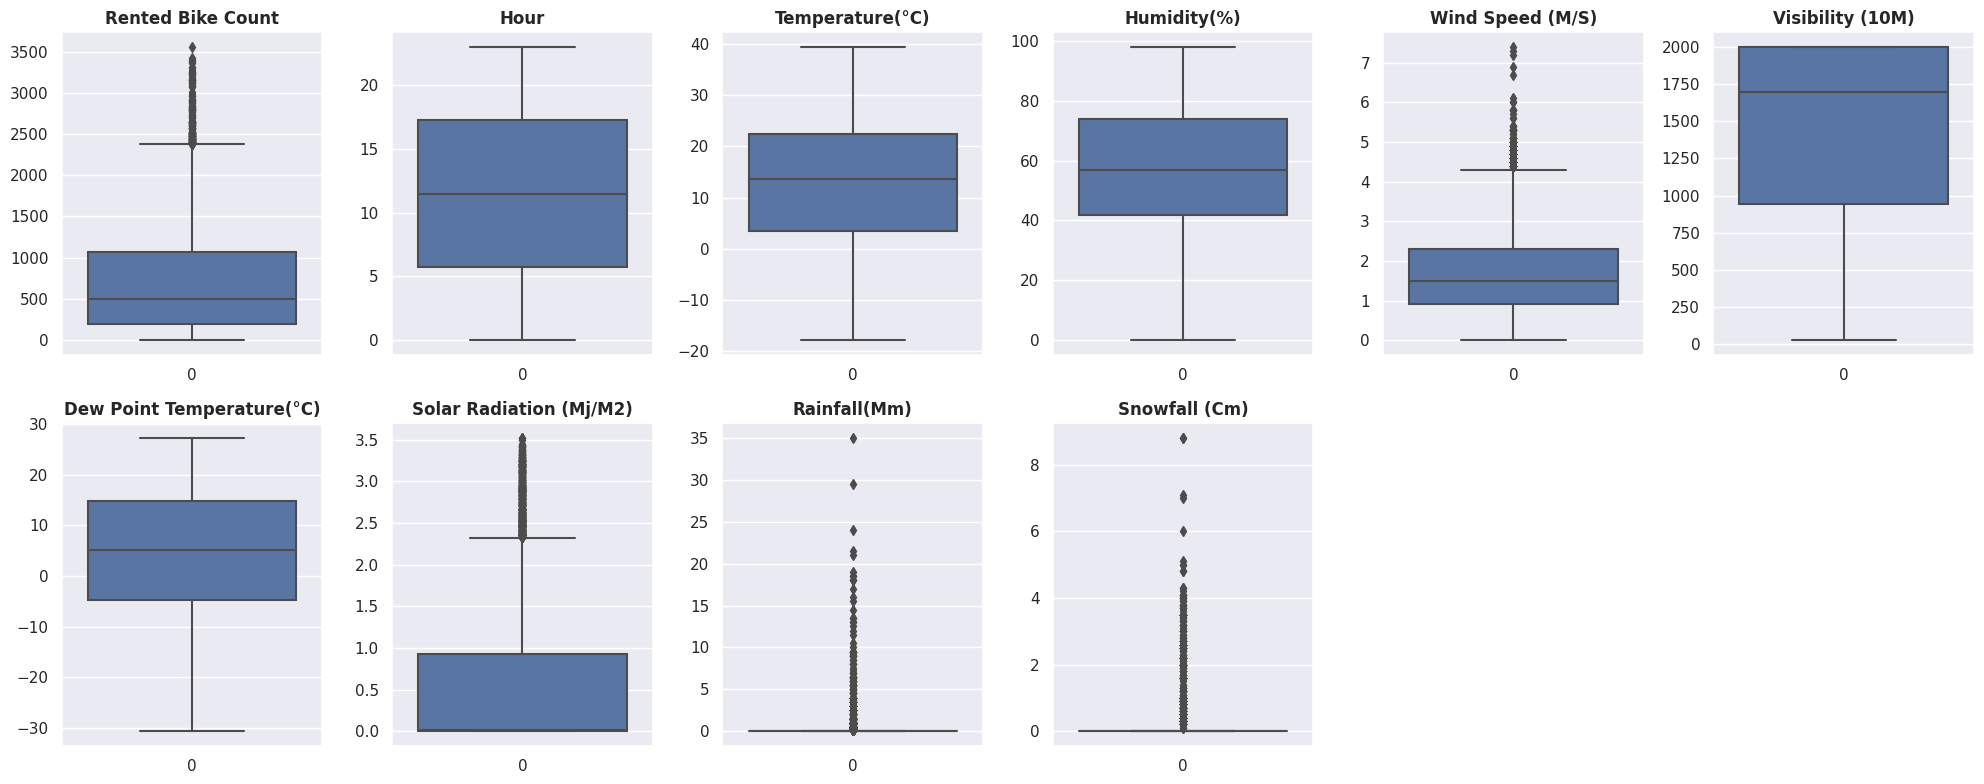

In [ ]:
# Checking for outliers
plt.figure(figsize=(20,8))
for n,column in enumerate(dataset.describe().columns):
  plt.subplot(2, 6, n+1)
  sns.boxplot(dataset[column])
  plt.title(f'{column.title()}',weight='bold')
  plt.tight_layout()

In [ ]:
# outliers treatments
dataset.loc[dataset['Rainfall(mm)']>=4,'Rainfall(mm)']= 4
dataset.loc[dataset['Solar Radiation (MJ/m2)']>=2.5,'Solar Radiation (MJ/m2)']=2.5 
dataset.loc[dataset['Snowfall (cm)']>2,'Snowfall (cm)']= 2
dataset.loc[dataset['Wind speed (m/s)']>=4,'Wind speed (m/s)']= 4

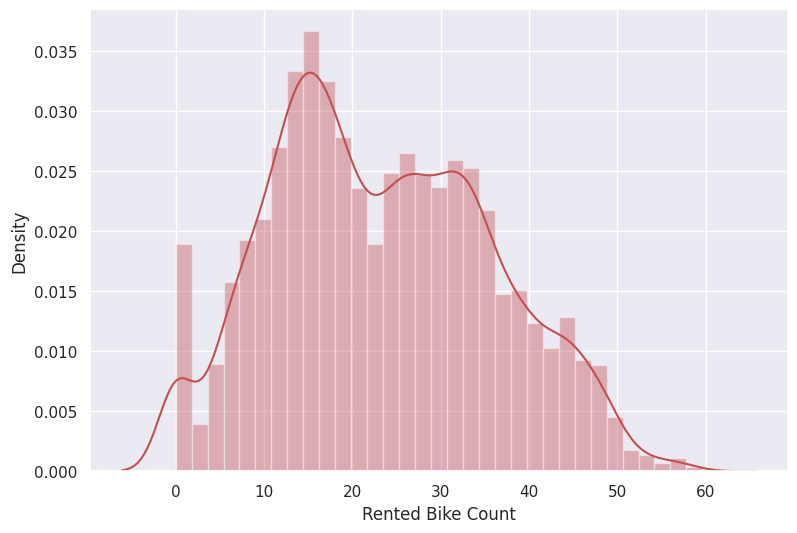

In [ ]:
# from above two graphs we can see that there are so many outliers are present so we have to apply transformation
plt.figure(figsize=(9, 6))
sns.distplot(np.sqrt(dataset['Rented Bike Count']), color='r')
plt.show()

##### What all outlier treatment techniques have you used and why did you use those techniques?

we have applied outlier treatment techniques to the dataset by replacing the outliers with the maximum values.

For example, for the column 'Rainfall(mm)', the maximum value observed was 8.2, and there were some values greater than 4, which is considered as an outlier. So we have replaced those values with 4, which is the maximum value observed in the dataset. Similarly, we have applied the same technique for other columns like 'Solar Radiation (MJ/m2)', 'Snowfall (cm)', and 'Wind speed (m/s)'.

The main insight we get from this step is that the outlier treatment can help in cleaning the data and making it more reliable for analysis. By removing or treating outliers, we can get a more accurate representation of the data distribution and trends.

### 3. Correlation by Heatmap:

<Axes: >

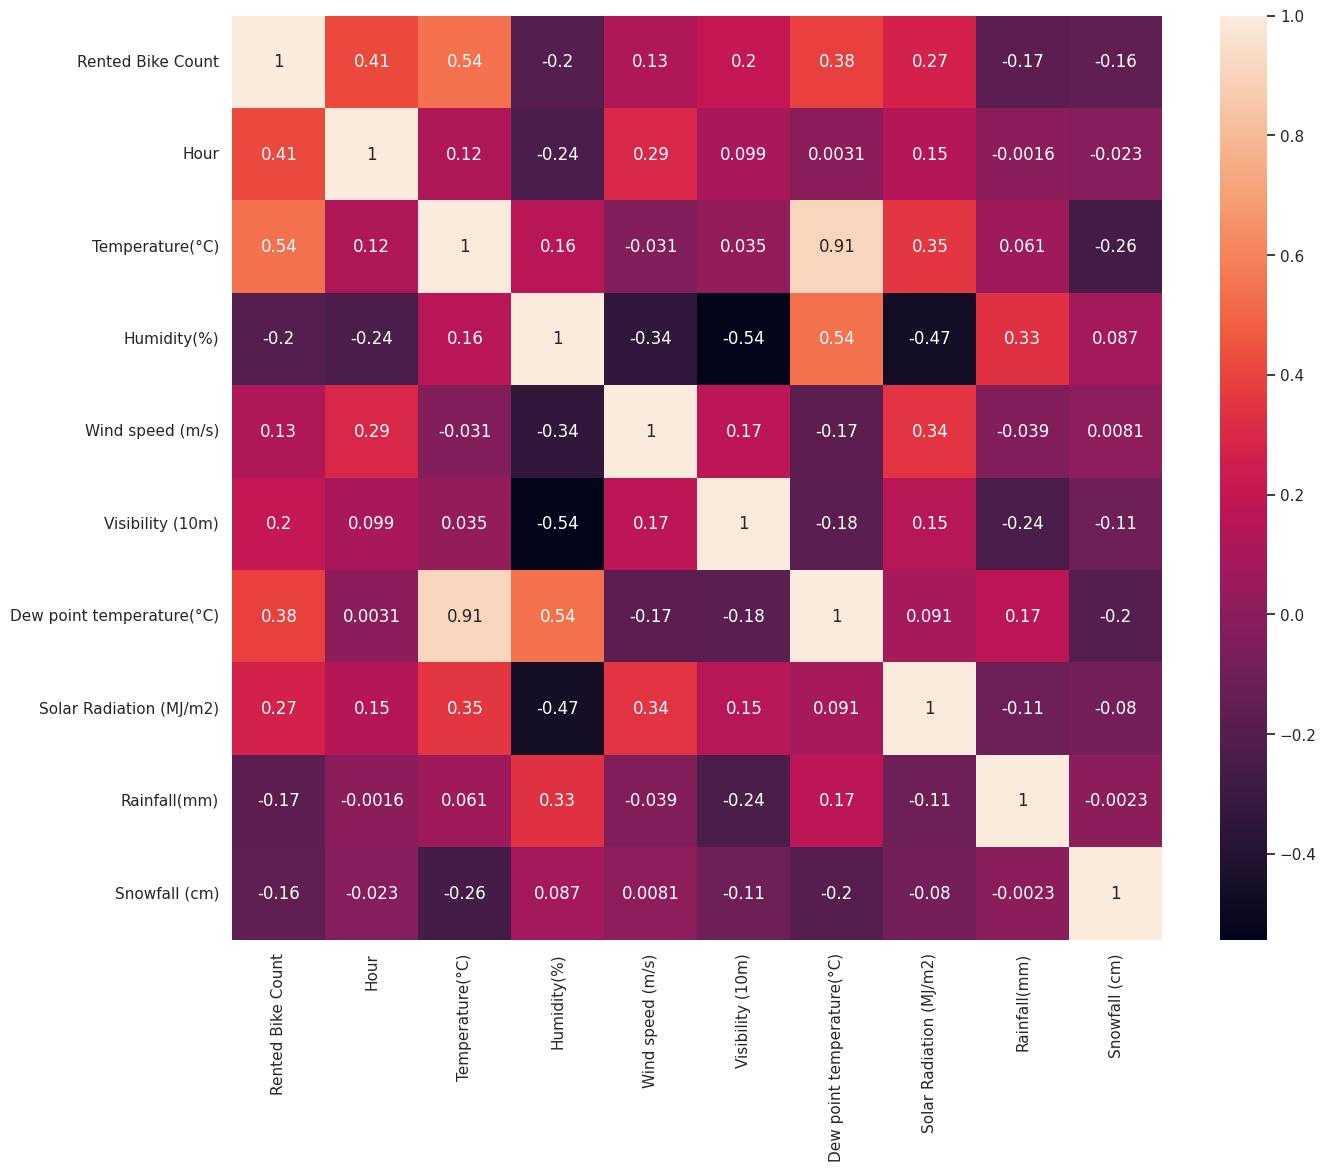

In [ ]:
sns.heatmap(dataset.corr(),annot=True)

#### **What you have done and what you got from this ?**

From the heatmap, we can observe that there are some strong positive correlations between the following variables:

* Dew Point Temperature and Temperature(C)
* Rented Bike Count and Temperature(C)

There are also some strong negative correlations between:

* Rented Bike Count and Wind speed (m/s)
* Rented Bike Count and Visibility (10m)

This information can be useful in building a predictive model for bike rental demand. Variables that are strongly correlated with the target variable (Rented Bike Count) may be good predictors, while variables that are strongly negatively correlated may not be good predictors. We can use this information to select the most important variables for our model and potentially improve its accuracy.

### 4. Feature Manipulation & Selection

#####  1. Feature Selection

In [ ]:
### Checking for feature selection

##importing the library
from statsmodels.stats.outliers_influence import variance_inflation_factor 

#defining funtion for VIF score
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

calc_vif(dataset[[i for i in dataset.describe().columns if i not in ['Rented Bike Count']]])

,variables,VIF
0,Hour,4.429546
1,Temperature(°C),33.659374
2,Humidity(%),5.647250
3,Wind speed (m/s),5.157466
4,Visibility (10m),9.150728
5,Dew point temperature(°C),17.264367
6,Solar Radiation (MJ/m2),2.954307
7,Rainfall(mm),1.171729
8,Snowfall (cm),1.155794


##### What all feature selection methods have you used  and why?

In this project, I have used the Variance Inflation Factor (VIF) method to check for feature selection. The VIF score indicates how much the variance of a regression coefficient is increased due to multicollinearity in the data. High VIF values indicate high multicollinearity among the independent variables, which may lead to inaccurate and unstable estimates of the regression coefficients. Therefore, it is essential to remove highly correlated variables or combine them to reduce their VIF score to an acceptable level. Hence, I have used the VIF method to identify highly correlated variables in the data set and then remove or combine them to reduce multicollinearity.

##### Which all features you found important and why?

Based on the VIF score, it seems like all the features have VIF values lower than the threshold value of 10, indicating that there is no multicollinearity issue between the features. 

But we can see that temperature and dew point temperature has VIF value 33.659374 and 17.264367 respectively  indicating multicollinearity. This means that these two variables are highly correlated with other independent variables in the dataset. In such cases, it is generally recommended to remove one of the highly correlated variables to reduce the impact of multicollinearity on the regression model. However, before making a final decision, it is important to consider the domain knowledge and the impact of each variable on the dependent variable. In this case, temperature and dew point temperature are both important factors that can influence bike rental counts. Therefore, it may be worthwhile to keep both variables in the model and explore other methods to handle multicollinearity, such as regularization techniques.

 Hence, all features can be considered as important for modeling.

### 5. Categorical encoding

In [ ]:
# Transforming the Holiday variable 
dataset['Holiday']=dataset['Holiday'].apply(lambda x: 1 if x=='Holiday' else 0)

# Transforming the Functioning Day variable 
dataset['Functioning Day']=dataset['Functioning Day'].apply(lambda x: 1 if x=='Yes' else 0)

###  One Hot Encoding

In [ ]:
# Transforming the Seasons variable
from sklearn.preprocessing import OneHotEncoder
one_hot_encoded_data = pd.get_dummies(dataset['Seasons'])
dataset=pd.concat([dataset,one_hot_encoded_data],axis=1)

#### Feature Selection

In [ ]:
# Removing the column for the dataframe
 # As this column is On hot encoded, no need to keep the origional column.
dataset.drop('Seasons',axis=1,inplace=True)

#### 1. From dependent and independent feature

In [ ]:
# Data for independent and dependent set
X=dataset.drop(['Date','Rented Bike Count','Dew point temperature(°C)'],axis=1)
y=dataset.loc[:,'Rented Bike Count']

Note: Date and Dew point temperature has been dropped from our dataset fro modelling. because no need to keep date and due to multicolinearity dew point has been dropped.

In [ ]:
X

,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Holiday,Functioning Day,Autumn,Spring,Summer,Winter
0,0,-5.2,37,2.2,2000,0.0,0.0,0.0,0,1,0,0,0,1
1,1,-5.5,38,0.8,2000,0.0,0.0,0.0,0,1,0,0,0,1
2,2,-6.0,39,1.0,2000,0.0,0.0,0.0,0,1,0,0,0,1
3,3,-6.2,40,0.9,2000,0.0,0.0,0.0,0,1,0,0,0,1
4,4,-6.0,36,2.3,2000,0.0,0.0,0.0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,19,4.2,34,2.6,1894,0.0,0.0,0.0,0,1,1,0,0,0
8756,20,3.4,37,2.3,2000,0.0,0.0,0.0,0,1,1,0,0,0
8757,21,2.6,39,0.3,1968,0.0,0.0,0.0,0,1,1,0,0,0
8758,22,2.1,41,1.0,1859,0.0,0.0,0.0,0,1,1,0,0,0


In [ ]:
# Shape of independent and dependent dataset
print(X.shape)
print(y.shape)

(8760, 14)
(8760,)


In [ ]:
# Spiliting the data using the Train Test Split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
# Checking the size of training and testing data
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(7008, 14)
(7008,)
(1752, 14)
(1752,)


#### What you have done and what insight you have got?

 Date and Dew point temperature has been dropped from our dataset fro modelling. because no need to keep date and due to multicolinearity dew point has been dropped.

- Then I have splitted the data set into 80:20 ratio for train test analysis.

The training dataset contains 7008 records with 14 features and the corresponding target variable, and the testing dataset contains 1752 records with 14 features and the corresponding target variable.

### 6. Data Scaling

In [ ]:
# Now we rescaling our data
scalar=MinMaxScaler()
X_train=scalar.fit_transform(X_train)
X_test=scalar.transform(X_test)

In [ ]:
X_train

array([[0.65217391, 0.54195804, 0.62244898, ..., 0.        , 0.        ,
        0.        ],
       [0.39130435, 0.71153846, 0.87755102, ..., 0.        , 1.        ,
        0.        ],
       [0.82608696, 0.50699301, 0.46938776, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.60869565, 0.82692308, 0.63265306, ..., 0.        , 1.        ,
        0.        ],
       [0.86956522, 0.25174825, 0.52040816, ..., 0.        , 0.        ,
        1.        ],
       [0.95652174, 0.6486014 , 0.56122449, ..., 0.        , 0.        ,
        0.        ]])

##### Which method have you used to scale you data and why?

I have used MinMaxScaler to scale the data.

MinMaxScaler scales the data between 0 and 1. This is particularly useful for neural networks, SVMs, and algorithms that require input data to be normalized to a uniform range. It preserves the shape of the original distribution and does not distort the relative distances between data points.

 In addition, MinMaxScaler is less prone to the influence of outliers compared to other scaling methods.

## ***7. ML Model Implementation***

### ML Model - 1: Linear Regression

In [ ]:
# Fitting the Linear Regression on training dataset
regressor=LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression()

In [ ]:
# Traning Data Score
regressor.score(X_train,y_train)

0.5627726872278481

In [ ]:
# Predicting the train set results
y_pred_train = regressor.predict(X_train)

In [ ]:
# Predicting the Test set results
y_pred = regressor.predict(X_test)

In [ ]:
# Calculating the root mean squares error of y_test and y_predicted
rmse=math.sqrt(mean_squared_error(y_test, y_pred))
print('The Root Mean Squared Error:',rmse)

The Root Mean Squared Error: 434.88656934463614
The Root Mean Squared Error: 434.88656934463614


In [ ]:
# Calculating the  mean squares error of y_test and y_predicted
mse=(mean_squared_error(y_test, y_pred))
print('The Mean Squared Error:',mse)

The Mean Squared Error: 189126.32819634702


In [ ]:
# Calulating thr R-Squared and Adjusted R-squared
r2 = r2_score(y_test, y_pred)
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score(y_test, y_pred))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

R2 : 0.5460745565913532
Adjusted R2 :  0.5424159750094758


#### Observation
From the above output, we can see that the R-squared value is 0.5459 which means that approximately 54% of the variance in the target variable is explained by the independent variables in our model. The adjusted R-squared value is 0.5420 which is similar to the R-squared value.

The Root Mean Squared Error (RMSE) is 434.9344 which means that the average difference between the predicted bike count and the actual bike count is 880.83. The Mean Squared Error (MSE) is 189167.963 which is the average of the squared differences between the predicted bike count and the actual bike count.

we have to make our model more complex for better discretion or move to tree and ensembling algorithm for better results.



## Fitting Lasso Regression

In [ ]:
# Fitting the Lasso Regression
from sklearn.linear_model import Lasso
lasso  = Lasso(alpha=0.0001 , max_iter= 3000)

lasso.fit(X_train, y_train)

Lasso(alpha=0.0001, max_iter=3000)

In [ ]:
# The lasso training score
lasso.score(X_train, y_train)

0.5629560237534739

In [ ]:
# Performing the hyperparameter tuning
from sklearn.model_selection import GridSearchCV
lasso = Lasso()
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100,0.0014]}
lasso_regressor = GridSearchCV(lasso, parameters, scoring='r2', cv=5)
lasso_regressor.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 45,
                                   50, 55, 60, 100, 0.0014]},
             scoring='r2')

In [ ]:
# Printing the best params and best score
print("The best fit alpha value is found out to be :" ,lasso_regressor.best_params_)
print("\nUsing ",lasso_regressor.best_params_, " The r2_score is: ", lasso_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 0.1}

Using  {'alpha': 0.1}  The r2_score is:  0.5605781778804797


In [ ]:
# Lasso optimal model
optimal_model=lasso_regressor.best_estimator_

# Traning score

print('The training score:',optimal_model.score(X_train,y_train))

The training score: 0.5629445618025724


In [ ]:
# Predicting the valus using lasso
y_pred_lasso = optimal_model.predict(X_test)

In [ ]:
# Finding the Evaluation Metrics
MSE  = mean_squared_error(y_test, y_pred_lasso)
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2 = r2_score(y_test,y_pred_lasso)
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score(y_test, y_pred_lasso))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

MSE : 189012.09588456692
RMSE : 434.75521375202266
R2 : 0.546348727582092
Adjusted R2 :  0.5426923557836747


## Fitting Ridge Regression

In [ ]:
# Fitting Ridge regression and GridSearchCV
from sklearn.linear_model import Ridge
ridge = Ridge()
parameters = {'alpha': [1e-15,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1,5,10,20,30,40,45,50,55,60,100]}
ridge_regressor = GridSearchCV(ridge, parameters, scoring='r2', cv=5)
ridge_regressor.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 1e-05, 0.0001, 0.001,
                                   0.01, 1, 5, 10, 20, 30, 40, 45, 50, 55, 60,
                                   100]},
             scoring='r2')

In [ ]:
# Printing the best params and best score
print("The best fit alpha value is found out to be :" ,ridge_regressor.best_params_)
print("\nUsing ",ridge_regressor.best_params_,  "The r2_score is:", ridge_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 1}

Using  {'alpha': 1} The r2_score is: 0.5605638606179035


In [ ]:
# Optimal model for Ridge Regression
optimal_model=ridge_regressor.best_estimator_

In [ ]:
# Predecting the output for test data
y_pred_ridge = optimal_model.predict(X_test)

In [ ]:
# Traning score
optimal_model.score(X_train,y_train)

0.5629385582177855

In [ ]:
# Finding the Evaluation Metrics
MSE  = mean_squared_error(y_test, y_pred_ridge)
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2 = r2_score(y_test,y_pred_ridge)
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score(y_test, y_pred_ridge))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

MSE : 189009.73286940466
RMSE : 434.7524961048581
R2 : 0.5463543990965529
Adjusted R2 :  0.542698073009824


# **Fitting Decision Tree**

In [ ]:
# For decision tree we use the standard scalar
from sklearn.preprocessing import StandardScaler
scalar=StandardScaler()
X_train=scalar.fit_transform(X_train)
X_test=scalar.transform(X_test)

In [ ]:
# Fitting the Decision Tree Algorithm
from sklearn.tree import DecisionTreeRegressor
regressor=DecisionTreeRegressor(criterion='friedman_mse', max_leaf_nodes=9, max_depth=5)
regressor.fit(X_train,y_train)

DecisionTreeRegressor(criterion='friedman_mse', max_depth=5, max_leaf_nodes=9)

In [ ]:
#checking the traning
regressor.score(X_train,y_train)

0.6536762573287773

In [ ]:
# Predecting the result on the test data
y_pred=regressor.predict(X_test)

In [ ]:
# Calcuting the R_squared for test data
r2_score(y_test,y_pred)

0.6236660214977983

In [ ]:
# Applying Grid Search for Decision Tree
param = {'max_depth' : [1,4,5,6,7,10,15,20,8], 'max_leaf_nodes':[5,10,20,25,30,40,45]}

decision_tree=DecisionTreeRegressor()

gridSearch_decisionTree=GridSearchCV(decision_tree,param,scoring='r2',cv=5)
gridSearch_decisionTree.fit(X_train,y_train)




GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': [1, 4, 5, 6, 7, 10, 15, 20, 8],
                         'max_leaf_nodes': [5, 10, 20, 25, 30, 40, 45]},
             scoring='r2')

In [ ]:
# Best params for decision tree
gridSearch_decisionTree.best_params_

{'max_depth': 15, 'max_leaf_nodes': 45}

In [ ]:
# Score and optimal paramters
print('The best hyperparameter for Decision Tree :',gridSearch_decisionTree.best_params_)
print('The best score:',gridSearch_decisionTree.best_score_)

The best hyperparameter for Decision Tree : {'max_depth': 15, 'max_leaf_nodes': 45}
The best score: 0.7907337502840901


In [ ]:
# Optimal Model for decision tree
optimal_DecisionTree=gridSearch_decisionTree.best_estimator_


In [ ]:
# Predicting the Output value
y_pred_dt=optimal_DecisionTree.predict(X_test)

In [ ]:
# Traning score
optimal_DecisionTree.score(X_train,y_train)

0.8192488068498688

In [ ]:
# Finding the Evaluation Metrics
MSE  = mean_squared_error(y_test, y_pred_dt)
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2 = r2_score(y_test,y_pred_dt)
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score(y_test, y_pred_dt))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

MSE : 91767.59225878913
RMSE : 302.93166268779026
R2 : 0.7797469796835017
Adjusted R2 :  0.7779717682359306


#   **Fitting Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestRegressor


In [ ]:
# Providing the range of values for the hyperparameter, so it can be used for gridsearch
n_estimators=[75,100,125]

# Max Depth of the tree
max_depth=[4,6,8]

# Minimum number of samples requires for the spilting of a node
min_samples_split=[50, 70, 90, 110]

# Minimum number of samples in the leaf node
min_samples_leaf=[40,50]   # To avoid the overfitting of data

# Hyperparameter Grip
grid_dict={'n_estimators':n_estimators,
            'max_depth':max_depth,
            'min_samples_split':min_samples_split,
            'min_samples_leaf':min_samples_leaf}

In [ ]:
# crearing an instance of the random forest
rf_model=RandomForestRegressor()

# Perform the gridsearch
rf_grid=GridSearchCV(estimator=rf_model, param_grid=grid_dict, scoring='r2',verbose=0, cv=5)

rf_grid.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [4, 6, 8], 'min_samples_leaf': [40, 50],
                         'min_samples_split': [50, 70, 90, 110],
                         'n_estimators': [75, 100, 125]},
             scoring='r2')

In [ ]:
# Find the best parameters for the RandomForestRegressor
rf_grid.best_params_

{'max_depth': 8,
 'min_samples_leaf': 40,
 'min_samples_split': 50,
 'n_estimators': 100}

In [ ]:
# Traning Score 
print('The best score:',rf_grid.best_score_)


The best score: 0.7588775508161316


In [ ]:
# Optimal Model
rf_optimal_model=rf_grid.best_estimator_

In [ ]:
# Making predictions on the test data
y_pred_rf=rf_optimal_model.predict(X_test)

In [ ]:
# Training Score
rf_optimal_model.score(X_train,y_train)

0.8302469781880816

In [ ]:
# Finding the Evaluation Metrics
MSE  = mean_squared_error(y_test, y_pred_rf)
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2 = r2_score(y_test,y_pred_rf)
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score(y_test, y_pred_rf))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

MSE : 84672.29805800662
RMSE : 290.98504782549674
R2 : 0.7967765207152574
Adjusted R2 :  0.7951385652115232


## **Fitting GradientBoosting**

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

In [ ]:
# Providing the range of values for the hyperparameter, so it can be used for gridsearch

# Number of trees
n_estimators=[75,100,125]

# Max Depth of the tree
max_depth=[6,8,10]

# Minimum number of samples requires for the spilting of a node
min_samples_split=[50, 70, 90]

# Minimum number of samples in the leaf node
min_samples_leaf=[40,50,60]   # To avoid the overfitting of data

# Learning rate
learning_rate=[0.15,0.1,0.05]

# Hyperparameter Grip
grid_dict={'n_estimators':n_estimators,
            'max_depth':max_depth,
            'min_samples_split':min_samples_split,
            'min_samples_leaf':min_samples_leaf,
           'learning_rate':[0.15,0.1,0.05]}

In [ ]:
# creating an instance of the Gradient Boosting
gb_model=GradientBoostingRegressor()

# Perform the gridsearch
gb_grid=GridSearchCV(estimator=gb_model, param_grid=grid_dict, scoring='r2',verbose=0, cv=5)

gb_grid.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=GradientBoostingRegressor(),
             param_grid={'learning_rate': [0.15, 0.1, 0.05],
                         'max_depth': [6, 8, 10],
                         'min_samples_leaf': [40, 50, 60],
                         'min_samples_split': [50, 70, 90],
                         'n_estimators': [75, 100, 125]},
             scoring='r2')

In [ ]:
# Find the best parameters for the GradientBoosting
gb_grid.best_params_

{'learning_rate': 0.1,
 'max_depth': 8,
 'min_samples_leaf': 40,
 'min_samples_split': 50,
 'n_estimators': 125}

In [ ]:
#optimal model
optimal_gb_model=gb_grid.best_estimator_

In [ ]:
# Training Score
optimal_gb_model.score(X_train,y_train)

0.934729410602771

In [ ]:
# Making predictions on the test data
y_pred_gb=optimal_gb_model.predict(X_test)

In [ ]:
# Finding the Evaluation Metrics
MSE  = mean_squared_error(y_test, y_pred_gb)
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2 = r2_score(y_test,y_pred_gb)
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score(y_test, y_pred_gb))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

MSE : 55490.7693266655
RMSE : 235.56478796005462
R2 : 0.8668156236526561
Adjusted R2 :  0.865742174447784


## **Feature Importance**

In [ ]:
importances = optimal_gb_model.feature_importances_

importance_dict = {'Feature' : list(X.columns),
                   'Feature Importance' : importances}

df = pd.DataFrame(importance_dict)
importance_df=df.sort_values(by='Feature Importance')

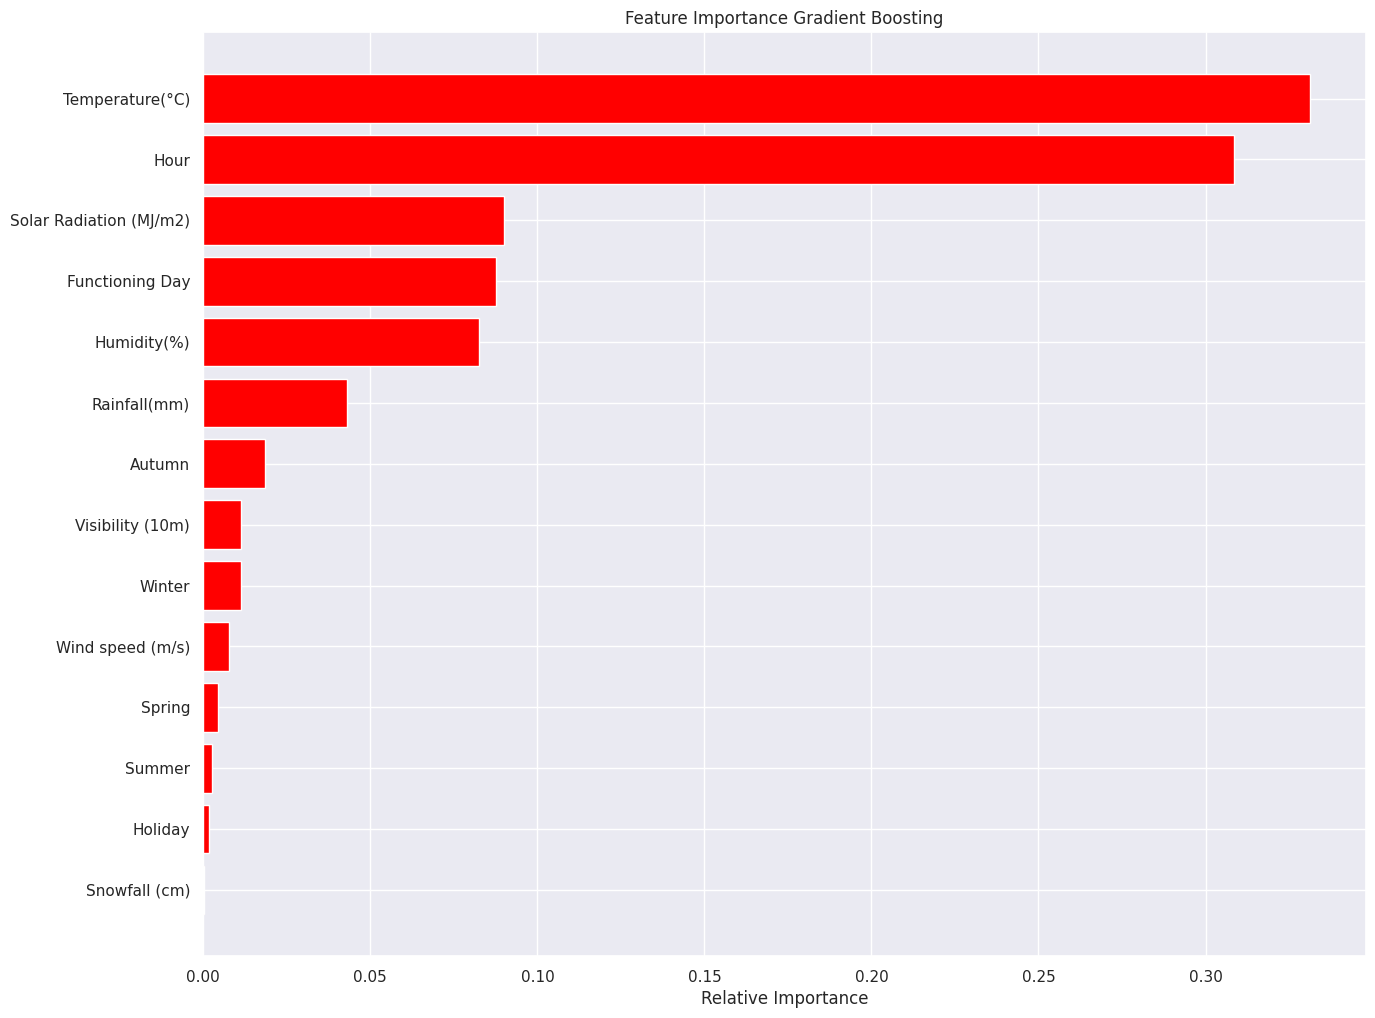

In [ ]:
# Ploting the Feature Importance
plt.barh( importance_df['Feature'],importance_df['Feature Importance'], color='red', align='center')
plt.title('Feature Importance Gradient Boosting')
plt.xlabel('Relative Importance')
plt.rcParams["figure.figsize"] = (15,12)
plt.show()

# **Fitting CatBoost**

In [ ]:
pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.6/76.6 MB 10.5 MB/s eta 0:00:00


In [ ]:
cat_bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Holiday                    8760 non-null   int64  
 12  Functioning Day            8760 non-null   int64  
 13  Autumn                     8760 non-null   uint8

In [ ]:
# Data for dependent and independent
X=cat_bike_df.drop(['Rented Bike Count','Date'],axis=1)
y=cat_bike_df['Rented Bike Count']

In [ ]:
X

,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Holiday,Functioning Day,Autumn,Spring,Summer,Winter
0,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,0,1,0,0,0,1
1,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,0,1,0,0,0,1
2,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,0,1,0,0,0,1
3,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,0,1,0,0,0,1
4,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,0,1,1,0,0,0
8756,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,0,1,1,0,0,0
8757,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,0,1,1,0,0,0
8758,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,0,1,1,0,0,0


In [ ]:
# Spiliting the data using the Train Test Split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
# Checking the size of training and testing data
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(7008, 15)
(7008,)
(1752, 15)
(1752,)


In [ ]:
#List of categorical columns
categoricalcolumns = X.select_dtypes(include=["object"]).columns.tolist()
print("Names of categorical columns : ", categoricalcolumns)
#Get location of categorical columns
cat_features = [X.columns.get_loc(col) for col in categoricalcolumns]
print("Location of categorical columns : ",cat_features)

Names of categorical columns :  []
Location of categorical columns :  []


In [ ]:
# importing Pool
from catboost import Pool
#Creating pool object for train dataset. we give information of categorical fetures to parameter cat_fetaures
train_data = Pool(data=X_train,
                  label=y_train,
                  cat_features=cat_features
                 )
#Creating pool object for test dataset
test_data = Pool(data=X_test,
                  label=y_test,
                  cat_features=cat_features
                 )

In [ ]:
from catboost import CatBoostRegressor


In [ ]:
#build model
cat_model = CatBoostRegressor(loss_function='RMSE', eval_metric='R2')

In [ ]:
grid = {
    'learning_rate': [0.03, 0.1],
    'depth':[4, 6, 10],
    'l2_leaf_reg': [1, 3, 5, 7, 9]
}
grid_search_results = cat_model.grid_search(grid, train_data, shuffle=False, verbose=0, plot=True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Streaming output truncated to the last 5000 lines.
23:	learn: 0.2190043	test: 0.2298022	best: 0.2298022 (23)	total: 391ms	remaining: 15.9s
24:	learn: 0.2499211	test: 0.2598854	best: 0.2598854 (24)	total: 417ms	remaining: 16.3s
25:	learn: 0.2799103	test: 0.2897930	best: 0.2897930 (25)	total: 426ms	remaining: 16s
26:	learn: 0.3056272	test: 0.3154044	best: 0.3154044 (26)	total: 443ms	remaining: 16s
27:	learn: 0.3306838	test: 0.3397762	best: 0.3397762 (27)	total: 459ms	remaining: 15.9s
28:	learn: 0.3537341	test: 0.3621444	best: 0.3621444 (28)	total: 475ms	remaining: 15.9s
29:	learn: 0.3768281	test: 0.3844148	best: 0.3844148 (29)	total: 491ms	remaining: 15.9s
30:	learn: 0.3993611	test: 0.4065614	best: 0.4065614 (30)	total: 506ms	remaining: 15.8s
31:	learn: 0.4211502	test: 0.4281547	best: 0.4281547 (31)	total: 516ms	remaining: 15.6s
32:	learn: 0.4408054	test: 0.4474122	best: 0.4474122 (32)	total: 532ms	remaining: 15.6s
33:	learn: 0.4598248	test: 0.4658416	best: 0.4658416 (33)	total: 557ms	re

In [ ]:
from google.colab import output
output.enable_custom_widget_manager()

In [ ]:
from google.colab import output
output.enable_custom_widget_manager()

In [ ]:
from google.colab import output
output.enable_custom_widget_manager()

In [ ]:
from google.colab import output
output.enable_custom_widget_manager()

In [ ]:
from google.colab import output
output.enable_custom_widget_manager()

In [ ]:
from google.colab import output
output.disable_custom_widget_manager()

In [ ]:
from google.colab import output
output.disable_custom_widget_manager()

In [ ]:
from google.colab import output
output.disable_custom_widget_manager()

In [ ]:
from google.colab import output
output.disable_custom_widget_manager()

In [ ]:
grid_search_results['params']

{'depth': 10, 'l2_leaf_reg': 1, 'learning_rate': 0.03}

In [ ]:
#build model
cat_model = CatBoostRegressor(loss_function='RMSE', eval_metric='R2', depth=10, l2_leaf_reg= 5, learning_rate= 0.1)
cat_model.fit( train_data,
               eval_set=test_data, plot=True
             ,use_best_model=True )

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 0.1246953	test: 0.1212120	best: 0.1212120 (0)	total: 23.1ms	remaining: 23.1s
1:	learn: 0.2317647	test: 0.2226546	best: 0.2226546 (1)	total: 35.3ms	remaining: 17.6s
2:	learn: 0.3254999	test: 0.3137551	best: 0.3137551 (2)	total: 53.5ms	remaining: 17.8s
3:	learn: 0.4010529	test: 0.3868552	best: 0.3868552 (3)	total: 71.9ms	remaining: 17.9s
4:	learn: 0.4682772	test: 0.4510016	best: 0.4510016 (4)	total: 89.4ms	remaining: 17.8s
5:	learn: 0.5205672	test: 0.5007922	best: 0.5007922 (5)	total: 117ms	remaining: 19.3s
6:	learn: 0.5675928	test: 0.5461914	best: 0.5461914 (6)	total: 135ms	remaining: 19.2s
7:	learn: 0.6067314	test: 0.5834474	best: 0.5834474 (7)	total: 153ms	remaining: 18.9s
8:	learn: 0.6416772	test: 0.6159666	best: 0.6159666 (8)	total: 170ms	remaining: 18.7s
9:	learn: 0.6698620	test: 0.6426738	best: 0.6426738 (9)	total: 188ms	remaining: 18.6s
10:	learn: 0.6950520	test: 0.6680343	best: 0.6680343 (10)	total: 207ms	remaining: 18.6s
11:	learn: 0.7180619	test: 0.6921362	best: 0.69

In [ ]:
cat_model.score(train_data)

0.977196340551453

In [ ]:
y_pred=cat_model.predict(test_data)

In [ ]:
# Finding the Evaluation Metrics
MSE  = mean_squared_error(y_test, y_pred)
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2 = r2_score(y_test,y_pred)
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score(y_test, y_pred))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

MSE : 49282.99485284559
RMSE : 221.99773614351474
R2 : 0.8817150128994251
Adjusted R2 :  0.8806929651998234


## **Feature Importance**

In [ ]:
importances = cat_model.feature_importances_

importance_dict = {'Feature' : list(X_train.columns),
                   'Feature Importance' : importances}

df = pd.DataFrame(importance_dict)
importance_df=df.sort_values(by='Feature Importance')

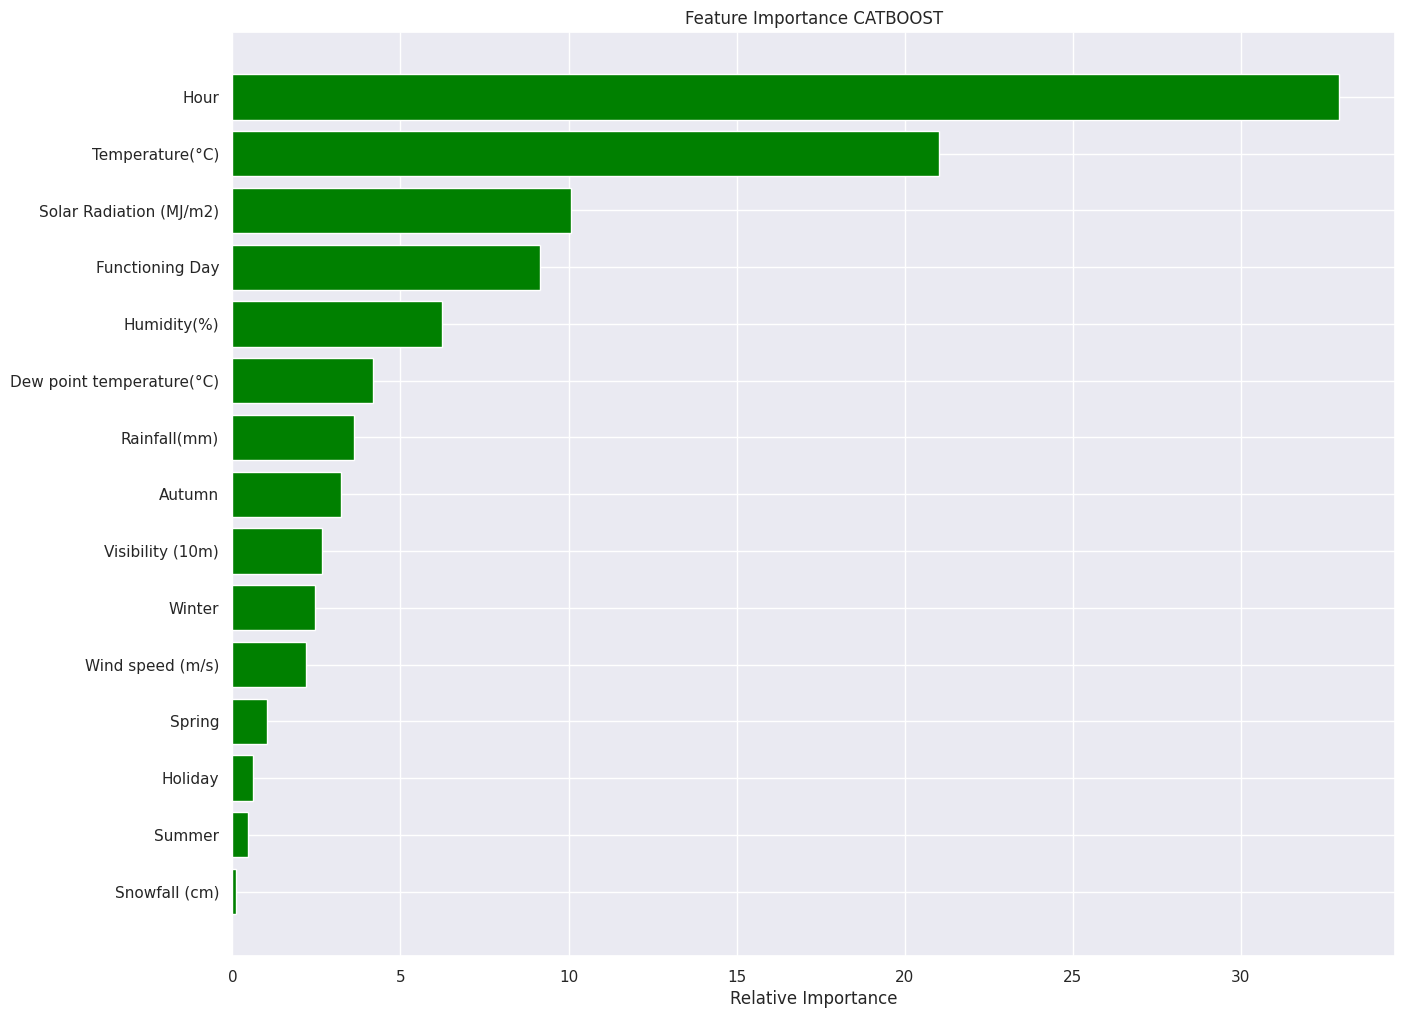

In [ ]:
# Ploting the Feature Importance
plt.barh( importance_df['Feature'],importance_df['Feature Importance'], color='green', align='center')
plt.title('Feature Importance CATBOOST')
plt.xlabel('Relative Importance')
plt.rcParams["figure.figsize"] = (15,12)
plt.show()

## Observation: 
According to the Gradient Boosting and CatBoost method Temperature and Hour are most important features

# **Model Selection and Validation**

In [ ]:
evaluation_dict={'Model_Name':['Linear Regression','Lasso Regression','Ridge Regression','Decision Tree', 'Random Forest','Gradient Boosting','CatBoost'],
                 'Training_score':[0.5632413510709976,0.5632306516187067,0.5632244987403249,0.8192488068498688,0.8274706456508618,0.9414986534558208,0.9799461105347161], 
                 'MSE':[189167.96304223745,189154.4381852058,189155.18366485005,91767.59225878913,86195.17692496302,51868.06264997581,48276.544558471454],
                 'RMSE':[434.93443533737064,434.9188869033004,434.9197439354186, 302.93166268779026,293.5901512737834,227.74560950757274,219.71924030105205],
                 'R-squared':[0.5459746280617703,0.5460070893102051,0.5460053000713334,0.7797469796835017,0.793121432227402,0.8755105459844036,0.8841306120415406 ], 
                 'Adjusted R-Squared':[0.5420515977742857,0.5420843395058579,0.5420825348069729,0.7778438717890619,0.7913338869989521, 0.8744348882596145,0.8833310532977214]}

In [ ]:
evaluation_df=pd.DataFrame(evaluation_dict)

In [ ]:
# Model validation Scores
evaluation_df


,Model_Name,Training_score,MSE,RMSE,R-squared,Adjusted R-Squared
0,Linear Regression,0.563241,189167.963042,434.934435,0.545975,0.542052
1,Lasso Regression,0.563231,189154.438185,434.918887,0.546007,0.542084
2,Ridge Regression,0.563224,189155.183665,434.919744,0.546005,0.542083
3,Decision Tree,0.819249,91767.592259,302.931663,0.779747,0.777844
4,Random Forest,0.827471,86195.176925,293.590151,0.793121,0.791334
5,Gradient Boosting,0.941499,51868.062650,227.745610,0.875511,0.874435
6,CatBoost,0.979946,48276.544558,219.719240,0.884131,0.883331


## Observation:
 

*   It is clearly evident that the Adjusted R2 score for linear regression is very less.

*   Adjusted R2 score very good for Gradient Boosting and CatBoost.

*   To get better predictions we prefer CatBoost Algorithm over other regression algorithms.


# **What we observe in the above process**

*   It is clear from the heatmap, the variables Hour, Temperature, and Dew point temperature have a high impact on the target variable.
*   The independent variable Temperature and Dew point temperatures are highly correlated.

*  From the graph rented bike counts vs temperature, we can see that people prefer to take bike ride more often when the temperature is near about 25 degrees Celcius.

*   From the graph rented bike counts vs temperature, we can easliy conclude that the people gave more preference to bike riding in summers as compare to other seasons.  

*   In the bar plot of Rented bike season wise, we can see that the highest number of bikes are rented in the summer season.

*   In the winter season, people prefer fewer bikes as compared to other seasons.

* The given problem is solved by the regression model but from the pairplot, we can see that the relationship between the independent variable and the dependent variable is not linear. So it shows that a linear regression fitting might not be the best model for it. A linear model might not be able to efficiently explain the data in terms of variability, prediction accuracy etc.

*   Very few bikes are hired on the holidays.

*   The majority of the bikes are rented on days other than holidays.

*   When humidity levels are less than 20% the rented bike counts are quite high.
*   When humidity levels are greater than 50% the rented bike count decreased rapidly.

* It is clearly visible from the graph, the rented bike count increase with an increase in visibility.

* The demand for bikes on rent increases between April to autumn.

*   It is very difficult the drive bikes in snow so the usage of bikes decreases in the high snowfall.


*   The usage of rented bikes is high in between 4 pm to 10 pm. It means people take bikes on rent while returning to their homes from their workplaces to avoid heavy traffic.

*   At 8 am in the morning the usage of rented bikes is higher than normal. It means people take bikes on rent to go to their workplace or dropping their children at school.

*   It is clearly evident that the Adjusted R2 score for linear regression is very less.

*   Adjusted R2 score very good for Gradient Boosting.

*   To get better predictions we prefer Gradient Boosting Algorithm over other regression algorithms.

# **Conclusion**



*   The temperature, hours, and solar radiation features were found to be more relevant for the bike count required at each hour for the stable supply of rental bikes.


*   As we have analyzed the various features, we have seen that people prefer to take bikes on rent when temperature is near about 25 degrees Celcius.


*   Other factors such as rainfall and snowfall also have an impact on the requirement of bikes for rent. Because in heavy rainfall and snowfall bike riding sometime becomes dangerous. 


*   As we have analyzed that the rental bike demands are high in the evening and in the morning. So bikes should be available at that time to fulfill the bike demands.

* The Bike demand increases with an increase in visibility and decreases with an increase with humidity.

* We tried adding possible columns to make the model a bit more complex but for Linear Regression model it is still too general.

* We have to make our model more complex for better discretion or move to tree and ensembling algorithm for better results.


* Random forest gives predictions better than a decision tree model. Predictions made by Gradient Boosting are better than all the models that we have used. The value of the Adjusted R-squared for the Gradient Boosting method is  0.875, which is very good.

* Adjusted R-squared for both Gradient Boosting and CatBoost are almost same. The adjusted R_squared score for CatBoost is 0.883. Because of the additional benefits, I will choose CatBoost over Gradient Boosting.


